<span>
<img src="http://ndlib.readthedocs.io/en/latest/_static/ndlogo2.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="https://kdd.isti.cnr.it/people/morini-virginia">Virginia Morini</a><br/>
<b>Python version:</b>  3.8.3<br/>
<b>NDlib version:</b>  5.1.1<br/>
<b>Last update:</b> 30/09/2021
</span>

<a id='top'></a>
# *NDlib*

## Tutorial - Spreading Processes
___
``NDlib`` is a python library designed to provide support to the analysis of diffusive phenomena occurring on top of complex network structures.

This notebook introduces some of the main features of the ``NDlib`` library as concern two different spreading processes: **Epidemics** and **Decision-based**.

As concern diffusion processes theory please refer to [The Atlas for the Aspiring Network Scientist](https://arxiv.org/pdf/2101.00863.pdf) by Michele Coscia. 

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Table of Contents
<a id="top"></a>
1. [NDlib Available models](#models) 
    1. [Epidemics](#epidemics)
    2. [Decision-based](#decision-based)
    3. [Opinion Dynamics](#opinions)
    4. [Simulation Workflow](#workflow)
2. [Installing NDlib](#install)
3. [Epidemics Models](#epidemics_core)
    1. [SI model: Susceptible-Infected](#si)
    2. [SIS model: Susceptible-Infected-Susceptible](#sis)
    3. [SIR model: Susceptible-Infected-Recovered](#sir)
    4. [Infection Seeds Selection](#seeds)
4. [Decision-Based Models](#decisionbased_core)
    1. [Threshold model](#threshold)
    2. [Independent Cascade model](#independentcascade)
    3. [Comparing Diffusion models](#comparing)
5. [Custom Model Definition](#custom)
    1. [Compartments](#compartments)
    2. [Compartments Composition](#composition)
    3. [Example: SIR](#sir)
6. [Conclusions](#conclusion)
7. [Exercise](#exercise)


<a id="models"></a>
## 1. NDlib Available models ([to top](#top))
___

The analysis of diffusive phenomena that unfold on top of complex networks is a task able to attract growing interests from multiple fields of research.

In order to provide a succinct framing of such complex and extensively studied problem it is possible to split the related literature into three broad, related, sub-classes: **Epidemics**, **Decision-based** and **Opinion Dynamics**.


<a id="epidemics"></a>
### 1.1 Epidemic Models ([to top](#top))

<img src="https://imagizer.imageshack.com/v2/1024x768q90/924/KEtHns.jpg" width="200px" height="auto"><br><br>

When we talk about epidemics, we think about contagious diseases caused by biological pathogens, like influenza, measles, chickenpox and sexually transmitted viruses that spread from person to person. 

Several elements determine the patterns by which epidemics spread through groups of people: the properties carried by the pathogen (its contagiousness, the length of its infectious period and its severity), the structure of the network as well as the mobility patterns of the people involved. 

In ``NDlib`` are implemented the following 6 Epidemic models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIm.html'>SI</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIS.html'>SIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html'>SIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIR.html'>SEIR</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIS.html'>SEIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SWIR.html'>SWIR</a></td>
    </tr>
</table>

<a id="decision-based"></a>
### 1.2 Decision-Based Models ([to top](#top))

<img src="https://imagizer.imageshack.com/v2/1024x768q90/922/a6iRyZ.png" width="200px" height="auto"><br><br>
Different from epidemics, some diffusion processes require that an individual choose to be infected to spread over a network.
Indeed, decision-based processes like the adoption of a product or behavior involve a conscious decision.  

Several mechanisms can drive the decision of an individual to be infected. For example, one may require reinforcement from other individuals or instead has more chance to infect someone else based on common features. 

In ``NDlib`` are implemented the following 6 Decision-based models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html'>Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html'>Generalised Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/KThreshold.html'>Kertesz Threshold</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Profile.html'>Profile</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html'>Profile-Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html'>Independent Cascades</a></td>
    </tr>
</table>

<a id="opinions"></a>
### 1.3 Opinion Dynamics ([to top](#top))
<img src="https://imagizer.imageshack.com/v2/1024x768q90/924/lDoHcw.png" width="200px" height="auto"><br><br>

A different field related with modelling social behaviour is that of opinion dynamics.

Recent years have witnessed the introduction of a wide range of models that attempt to explain how opinions form in a population, taking into account various social theories (e.g. bounded confidence or social impact).

In ``NDlib`` are implemented the following 6 Opinion Dynamics models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Voter.html'>Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/QVoter.html'>Q-Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/MajorityRule.html'>Majority Rule</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Snajzd.html'>Sznajd</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/COD.html'>Cognitive Opinion Dynamics</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/AlgorithmicBias.html'>Algorithmic Bias</a></td>
    </tr>
</table>

<a id='workflow'></a>
### 1.4 Simulation Workflow ([to top](#top))

``Ndlib`` breaks the simulation of diffusive phenomena into a standard workflow:
- Graph object creation
- Diffusion model Selection and Configuration
- Simulation execution
- Results visualisation

In the following sections we will observe how to templating such workflow describing some **Epidemics** and **Decision-Based** simulations.


<a id='install'></a>
## 2. Installing NDlib ([to top](#top))
___

As a first step, we need to make sure that ``NDlib`` is installed and working.

The library is available for both python 2.7 and 3.x, and its stable version can be installed using ``pip``:

In [1]:
pip install ndlib==5.1.1

  Using cached ndlib-5.1.1-py3-none-any.whl (110 kB)
  Attempting uninstall: ndlib
    Found existing installation: ndlib 5.1.0
    Uninstalling ndlib-5.1.0:
      Successfully uninstalled ndlib-5.1.0
Note: you may need to restart the kernel to use updated packages.


On the project [GitHub](https://github.com/GiulioRossetti/ndlib) are also available the nightly builds that can be installed as follows:

    pip install git+https://github.com/GiulioRossetti/ndlib.git > /dev/null

In order to check if ``ndlib`` has been correctly installed just try to import it

In [2]:
import ndlib

<a id='epidemics_core'></a>
## 3. Epidemics Models ([to top](#top))
___

<img src="https://imagizer.imageshack.com/v2/1024x768q90/922/6ZZYFs.png" width="900px" height="auto"><br><br>


<a id="graph"></a>
#### Graph object creation ([to top](#top))

As a first step we need to define the network topology that will be used as playground to study diffusive phenomena.

``NDlib`` leverage [``networkx``](https://networkx.github.io) data structure to provide support for both directed and undirected graphs.

In this example, to perform our simulation, we read a **Mobility graph** from a .csv file as follows: 

In [3]:
import networkx as nx

def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=l[2])
    return g

# Mobility Network
g = read_net('../data/flow_nyc_7days.csv')
print(g.number_of_nodes())
print(g.number_of_edges())

306
2000


<a id="si"></a>
### 3.A SI: Susceptible-Infected ([to top](#top))

In this model, during the course of an epidemics, a node is allowed to change its status only from **Susceptible (S)** to **Infected (I)**.

The model is instantiated on a graph having a non-empty set of infected nodes.

SI assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability β: once a node becomes infected, it stays infected (the only transition allowed is **S→I**).

**Note:** The SI Model is built upon the homogenous mixing hypothesis. So, we assume that each susceptible individual has the same probability to come into contact with an infected person. 


<a id="model"></a>
#### Model Selection and Configuration ([to top](#top))

After having defined the graph, we can select the diffusion model to simulate. In our example we import the SI model and instantiate it on our graph.

In [4]:
import ndlib.models.epidemics as models

SI_model = models.SIModel(g)

Every diffusion model has its own parameter, ``NDlib`` offers a common interface to specify them: ``ModelConfig``.
``ModelConfig`` takes care of validating model parameters.

Indeed, every model has its own parameters: model specific parameter list and definitions are available on the project [documentation site](http://ndlib.readthedocs.io).

In order to get a description of the required parameters just access the ``parameter`` field

In [5]:
import json
print(json.dumps(SI_model.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": "[0,1]",
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


Similarly, to obtain a list of the statuses implemented in the selected model just access the ``available_statuses`` field

In [6]:
SI_model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [7]:
import ndlib.models.ModelConfig as mc

cfg = mc.Configuration()
cfg.add_model_parameter('beta',0.10) # infection rate

``ModelConfig`` also allows to describe the initial condition of the simulation. It makes possible, for instance, to specify the initial percentage of infected nodes in the network.

In [8]:
cfg.add_model_parameter("percentage_infected", 0.1) # 10% of all nodes are initially infected
SI_model.set_initial_status(cfg)

<a id="simulation"></a>
#### Simulation Execution ([to top](#top))

Once described the network, the model and the initial conditions it is possible to perform the simulation.

``NDlib`` models diffusive phenomena as **discrete-time**, **agent-based** processes: during every iteration all nodes are evaluated and, their statuses are updated accordingly to the model rules.

Iterations can be required (incrementally) by using two methods:
- ``iteration()``
- ``iteration_bunch(nbunch, node_status=False)``

The former computes a single iteration step, the latter executes ``nbunch`` iterations. 

The ``node_status`` parameter allows to return the individual node status at each iteration.

In [9]:
iterations = SI_model.iteration_bunch(100, node_status=False)
iterations[99]

{'iteration': 99,
 'status': {},
 'node_count': {0: 0, 1: 306},
 'status_delta': {0: 0, 1: 0}}

To abstract from iterations details it is possible to transform them into diffusion **trends** using the ``build_trends(iterations)`` method:

In [10]:
trends = SI_model.build_trends(iterations)

#### Results Visualisation ([to top](#top))

Finally, ``NDlib`` allows to inspect the behavior of the simulated model using standard plots such as the ``DiffusionTrend`` and ``DiffusionPrevalence`` ones.

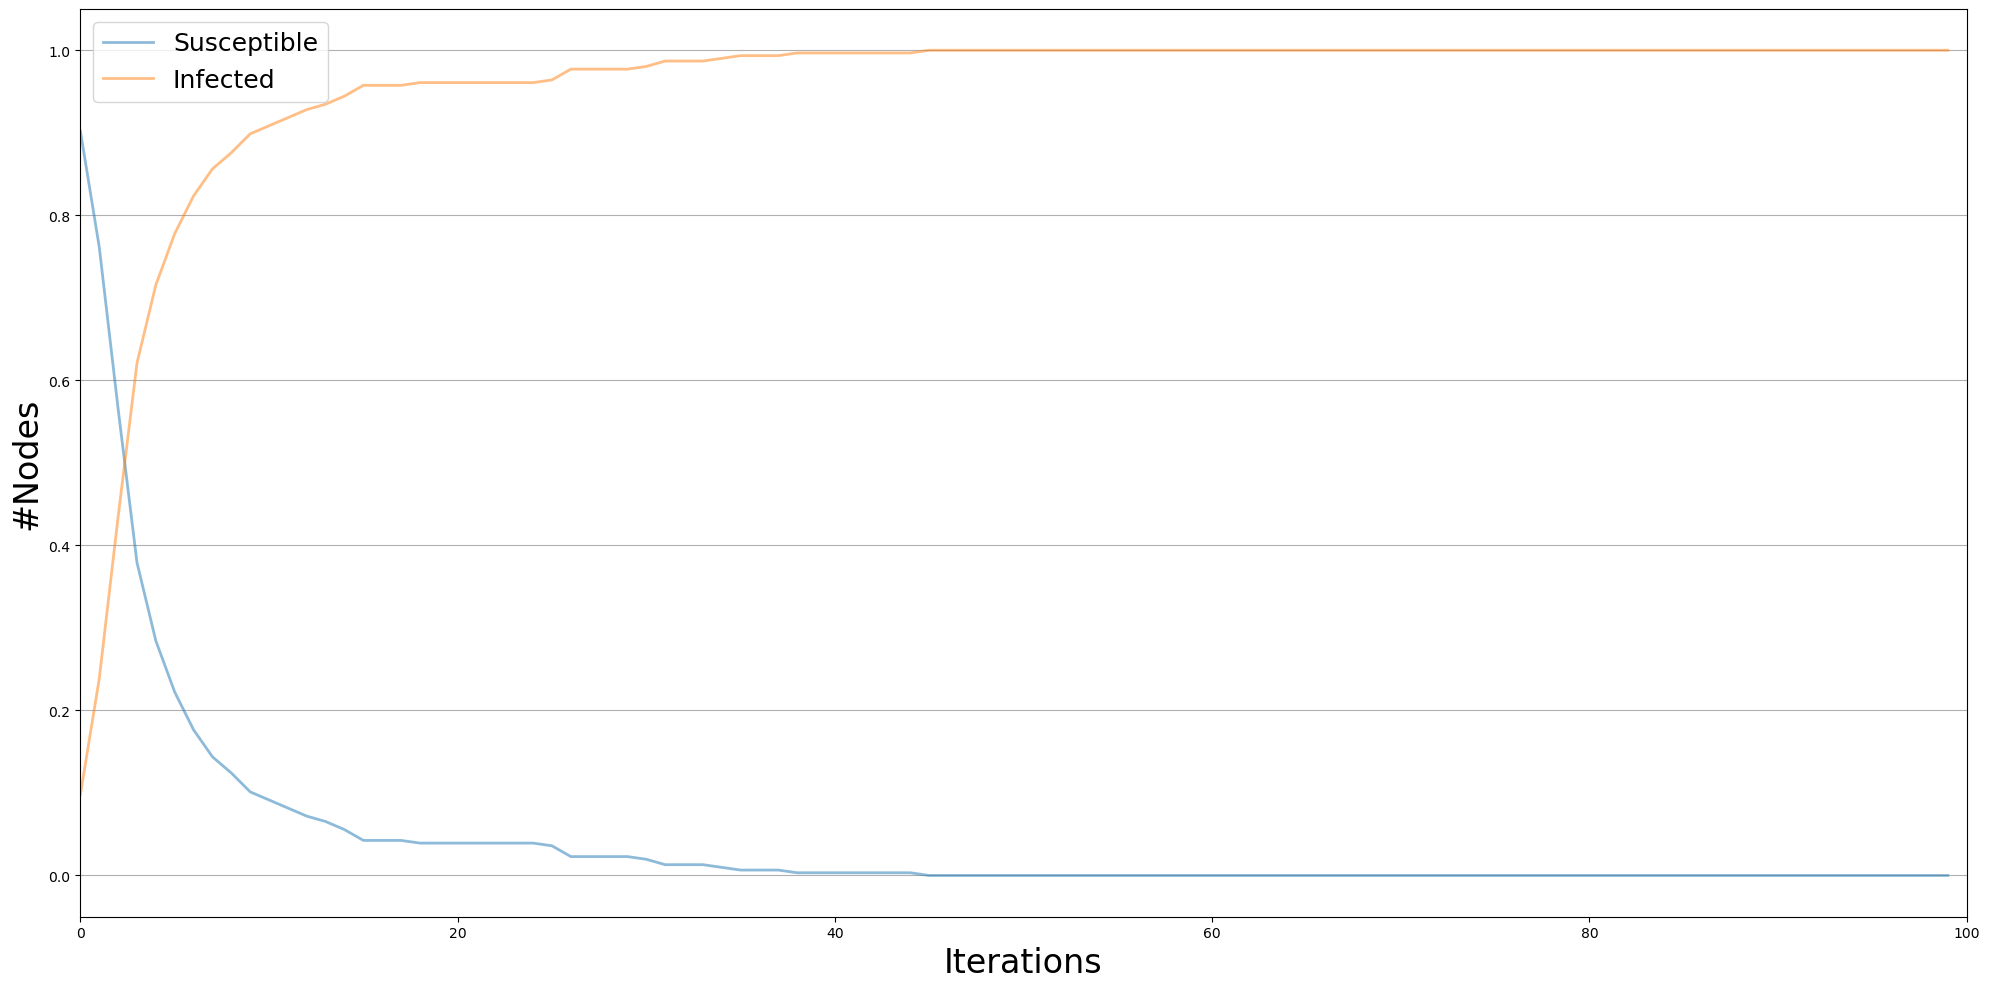

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
viz = DiffusionTrend(SI_model, trends)
viz.plot()

The prevalence plot captures the variation (delta) of nodes for each status in consecutive iterations

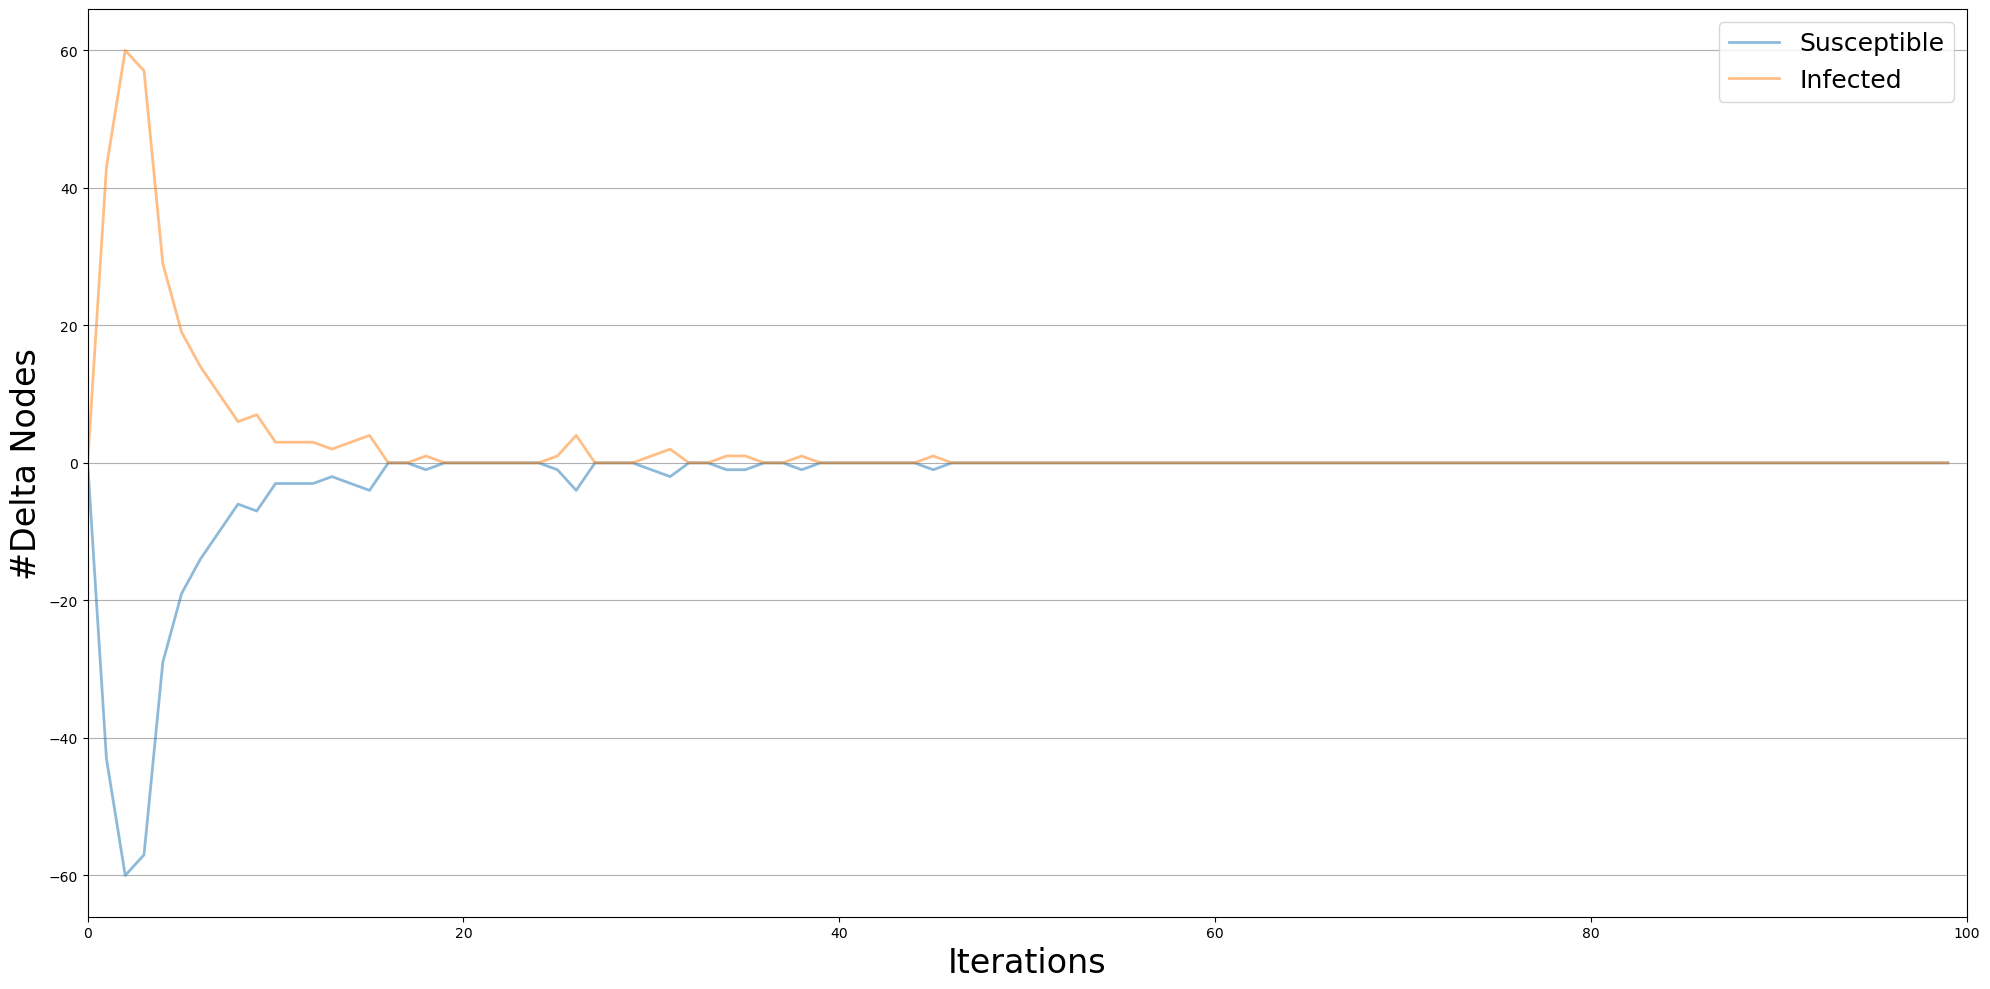

In [13]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(SI_model, trends)
viz.plot()

To obtain web-oriented versions of such plots ``NDlib`` exposes a second visualisation endpoint built on top of [``bokeh``](https://bokeh.pydata.org/en/latest/): the plotting facilities its defines are collected within the sub-package ``ndlib.viz.bokeh`` and follow the same rationale of their ``matplotlib`` counterpart.

<a id="sis"></a>
### 3.B SIS: Susceptible-Infected-Susceptible ([to top](#top))

In this model, during the course of an epidemics, a node is allowed to change its status from **Susceptible (S)** to **Infected (I)**.

The model is instantiated on a graph having a non-empty set of infected nodes.

SIS assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, then it can be switch again to susceptible with probability λ (the only transition allowed are **S→I→S**).

In [14]:
# Mobility Network
g = read_net('../data/flow_nyc_7days.csv')
# Model Selection
SIS_model = models.SISModel(g)
print(SIS_model.available_statuses)
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.10) # infection rate
cfg.add_model_parameter('lambda', 0.10) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.1)
SIS_model.set_initial_status(cfg)
# Simulation Execution
iterations = SIS_model.iteration_bunch(100, node_status=True)
trends = SIS_model.build_trends(iterations)

{'Susceptible': 0, 'Infected': 1}


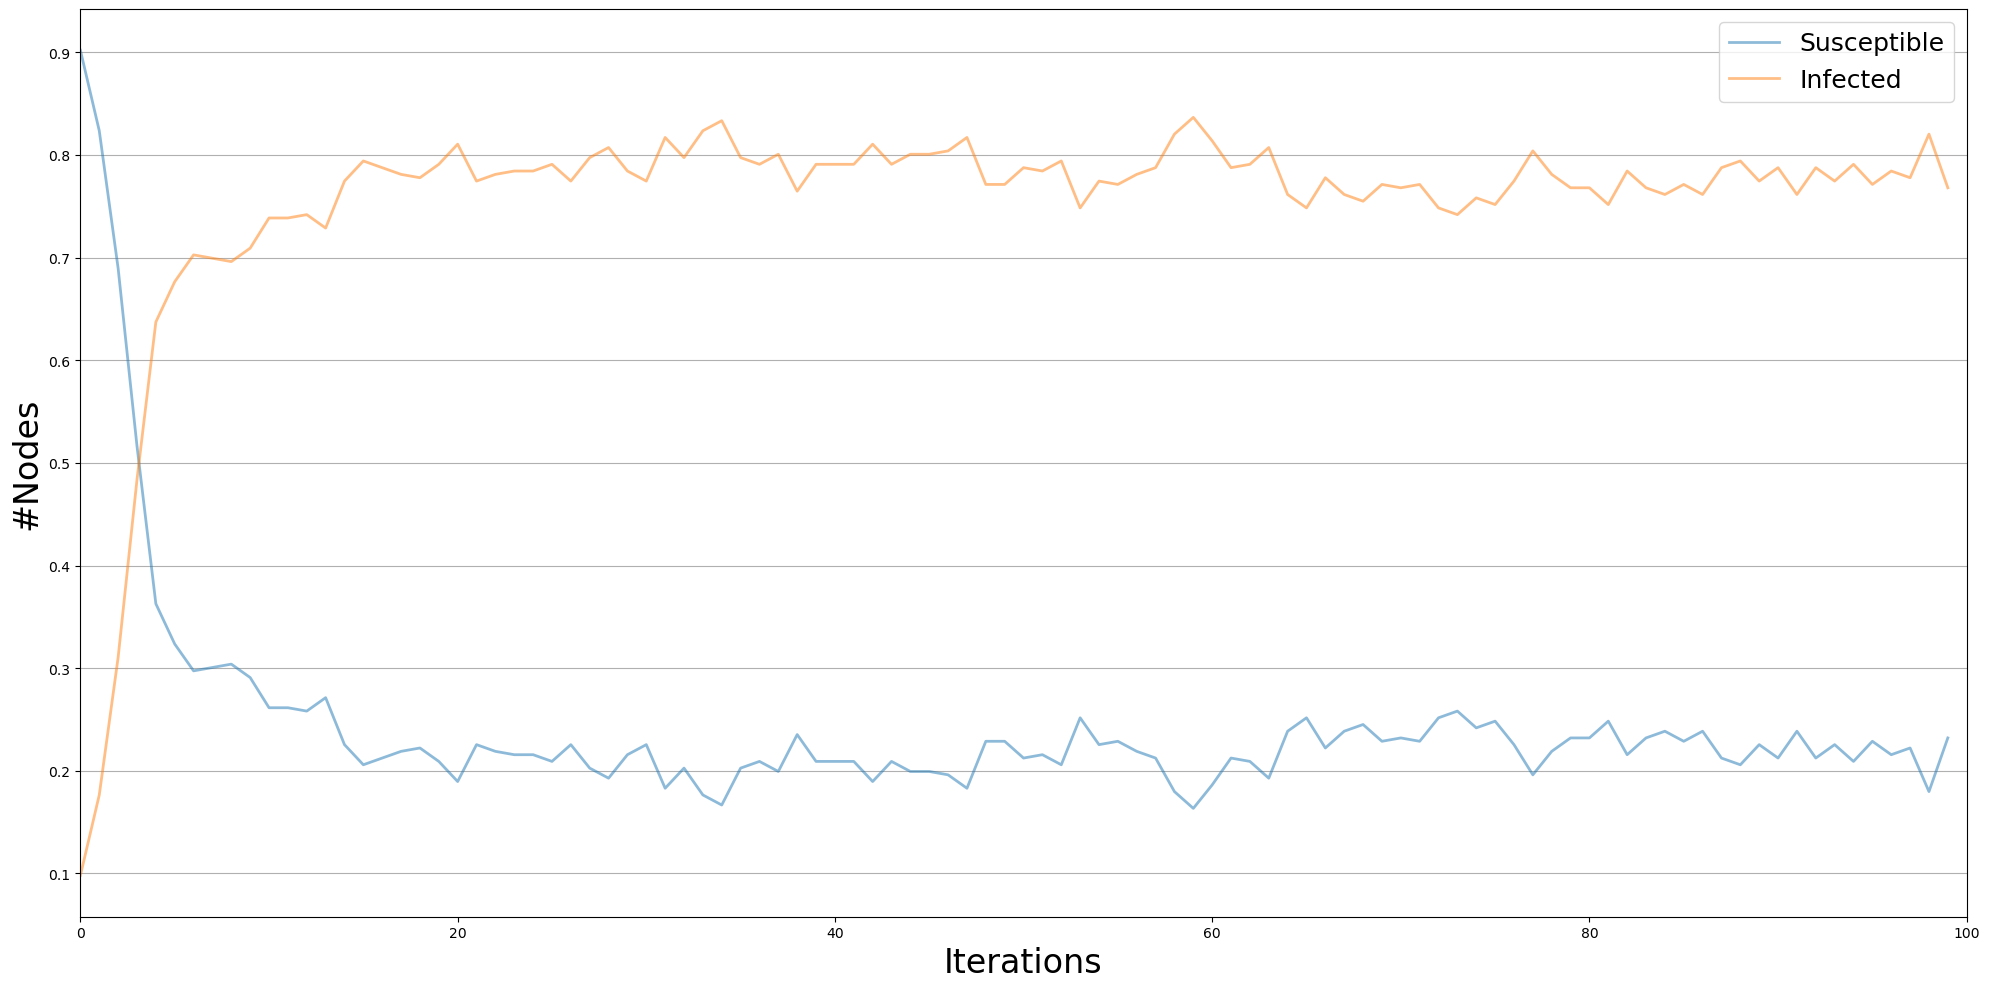

In [15]:
viz = DiffusionTrend(SIS_model, trends)
viz.plot()

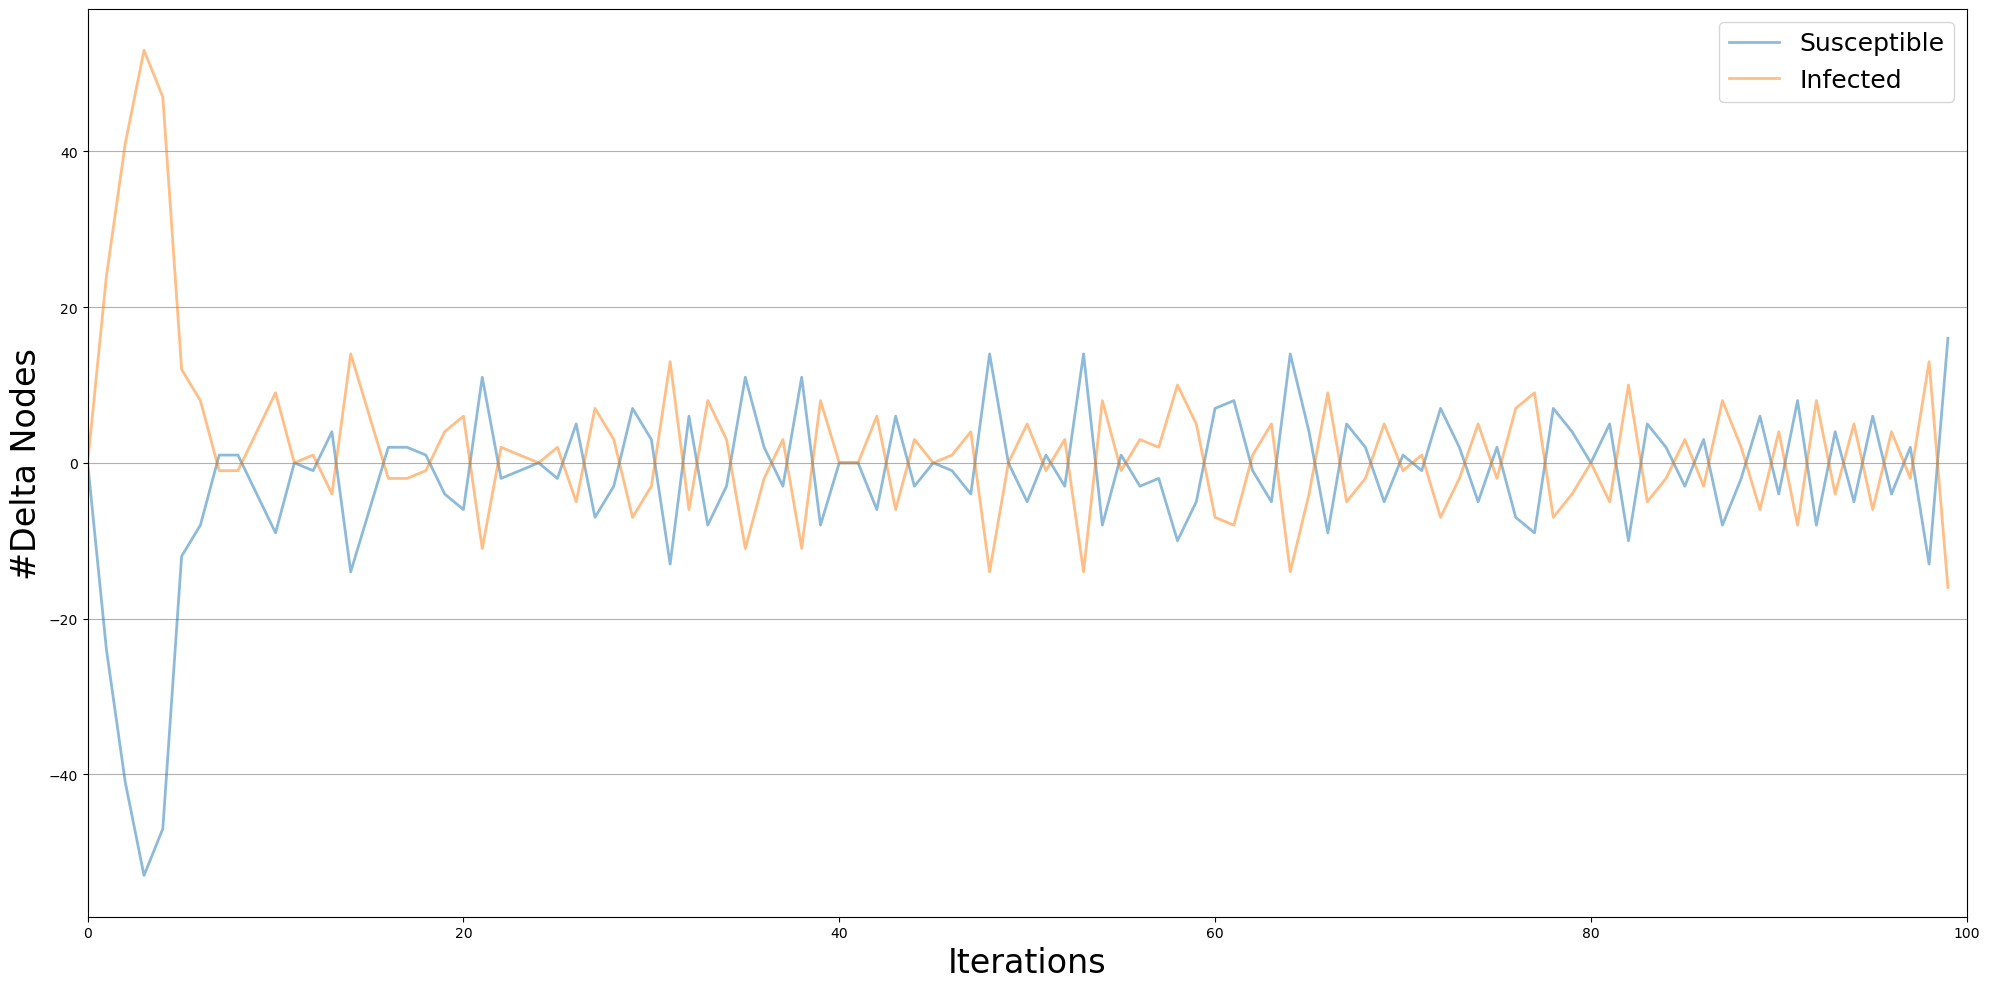

In [16]:
viz = DiffusionPrevalence(SIS_model, trends)
viz.plot()

<a id="sir"></a>
### 3.C SIR: Susceptible-Infected-Recovered ([to top](#top))

In this model, during the course of an epidemics, a node is allowed to change its status from **Susceptible (S)** to **Infected (I)**, then to **Removed (R)**.

The model is instantiated on a graph having a non-empty set of infected nodes.

SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability β, than it can be switch to removed with probability γ (the only transition allowed are **S→I→R**).

In [17]:
# Mobility Network
g = read_net('../data/flow_nyc_7days.csv')
# Model Selection
SIR_model = models.SIRModel(g)
print(SIR_model.available_statuses)
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.30) # infection rate
cfg.add_model_parameter('gamma', 0.20) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.10)
SIR_model.set_initial_status(cfg)
# Simulation Execution
iterations = SIR_model.iteration_bunch(100, node_status=True)
trends = SIR_model.build_trends(iterations)

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}


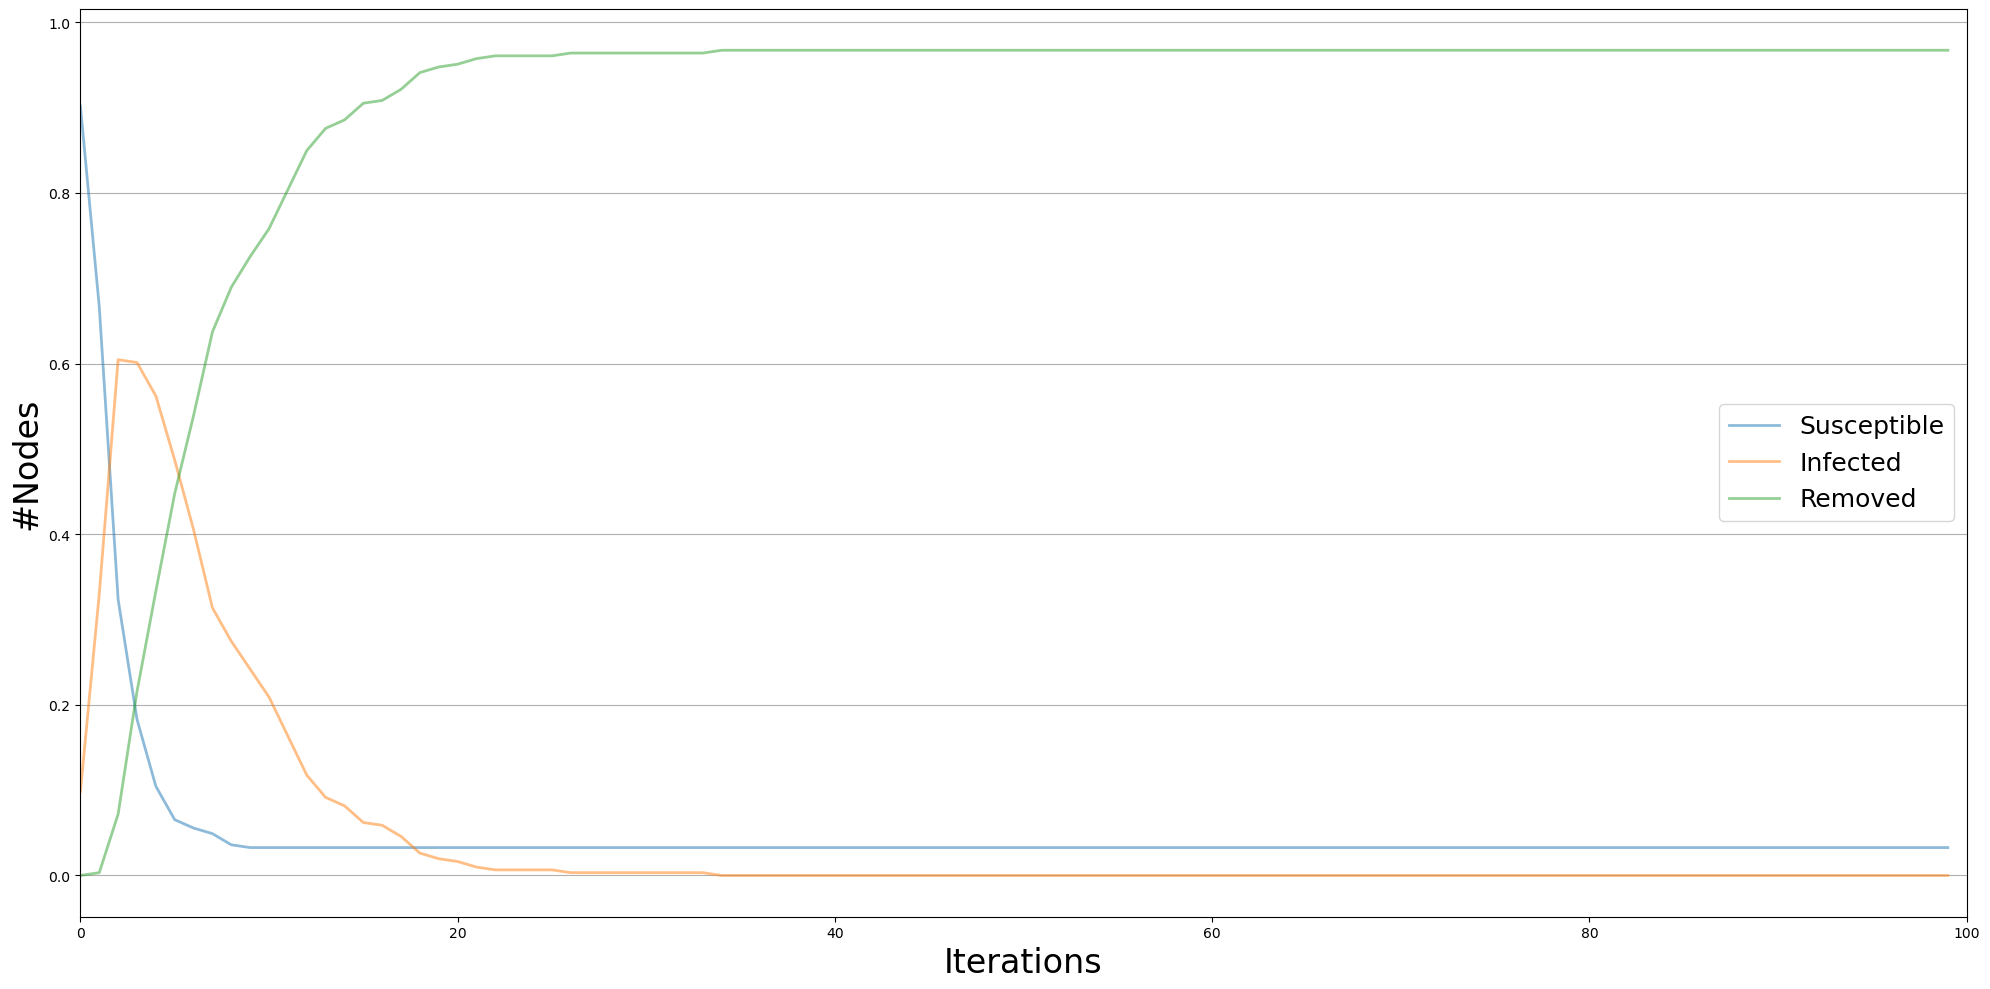

In [18]:
viz = DiffusionTrend(SIR_model, trends)
viz.plot()

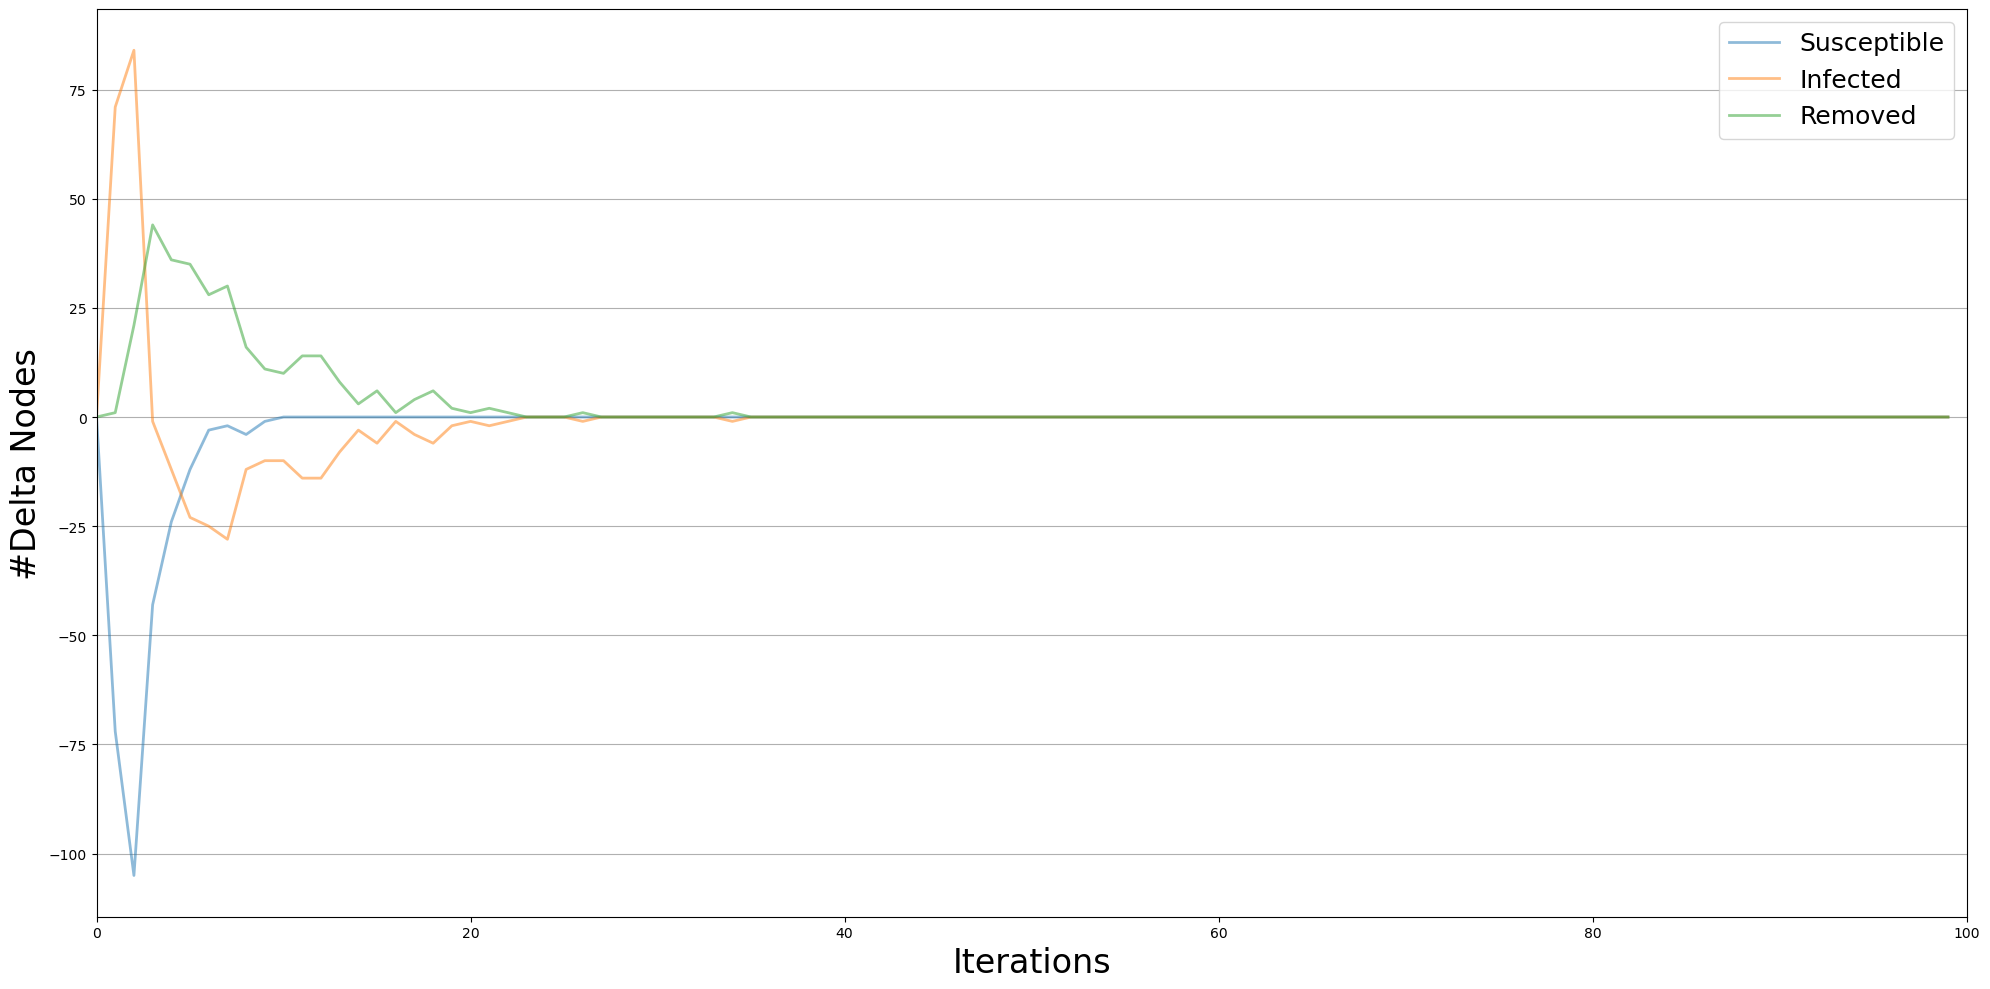

In [19]:
viz = DiffusionPrevalence(SIR_model, trends)
viz.plot()

<a id="seeds"></a>
### 3.D Infection Seeds Selection ([to top](#top))

Status configuration allows to specify explicitly the status of a set of nodes at the beginning of the simulation.

So far we have assumed that a random sample of nodes (10% in our examples) were initially infected: in order to cover more specific simulation scenarios we can also explicitly *specify* the nodes belonging to each *status* at the beginning of the simulation.

For example, let's choose the **SIS** model and start the infection from the nodes having the **highest degree centralities** (i.e., hubs):

In [20]:
# Mobility Network
g = read_net('../data/flow_nyc_7days.csv')

# compute degree centralities 
degrees = dict(g.degree()) # compute the degree of a set of nodes 
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]

# select as infected nodes the 10% of all nodes having the highest degree centralities
n_infected_nodes = g.number_of_nodes() // 10 
ranks = ranks[0:n_infected_nodes]
print(ranks)
hubs = [node_degree[0] for node_degree in ranks]
print(hubs)

[('209', 123), ('208', 93), ('187', 92), ('186', 86), ('188', 81), ('210', 78), ('185', 77), ('207', 61), ('184', 57), ('204', 56), ('232', 54), ('206', 45), ('165', 45), ('229', 43), ('233', 41), ('518', 41), ('261', 39), ('211', 38), ('293', 35), ('183', 34), ('182', 33), ('164', 33), ('203', 33), ('467', 32), ('234', 31), ('226', 31), ('442', 30), ('256', 29), ('235', 28), ('288', 28)]
['209', '208', '187', '186', '188', '210', '185', '207', '184', '204', '232', '206', '165', '229', '233', '518', '261', '211', '293', '183', '182', '164', '203', '467', '234', '226', '442', '256', '235', '288']


In [21]:
# Model Selection
SIS_model = models.SISModel(g)
print(SIS_model.available_statuses)
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.30) # infection rate
cfg.add_model_parameter('lambda', 0.30) # recovery rate
cfg.add_model_initial_configuration("Infected", hubs)

SIS_model.set_initial_status(cfg)
# Simulation Execution
iterations = SIS_model.iteration_bunch(100, node_status=True)
trends = SIS_model.build_trends(iterations)

{'Susceptible': 0, 'Infected': 1}


**NB:** Explicit status specification takes priority over the percentage specification expressed via model definition (e.g. percentage_infected).

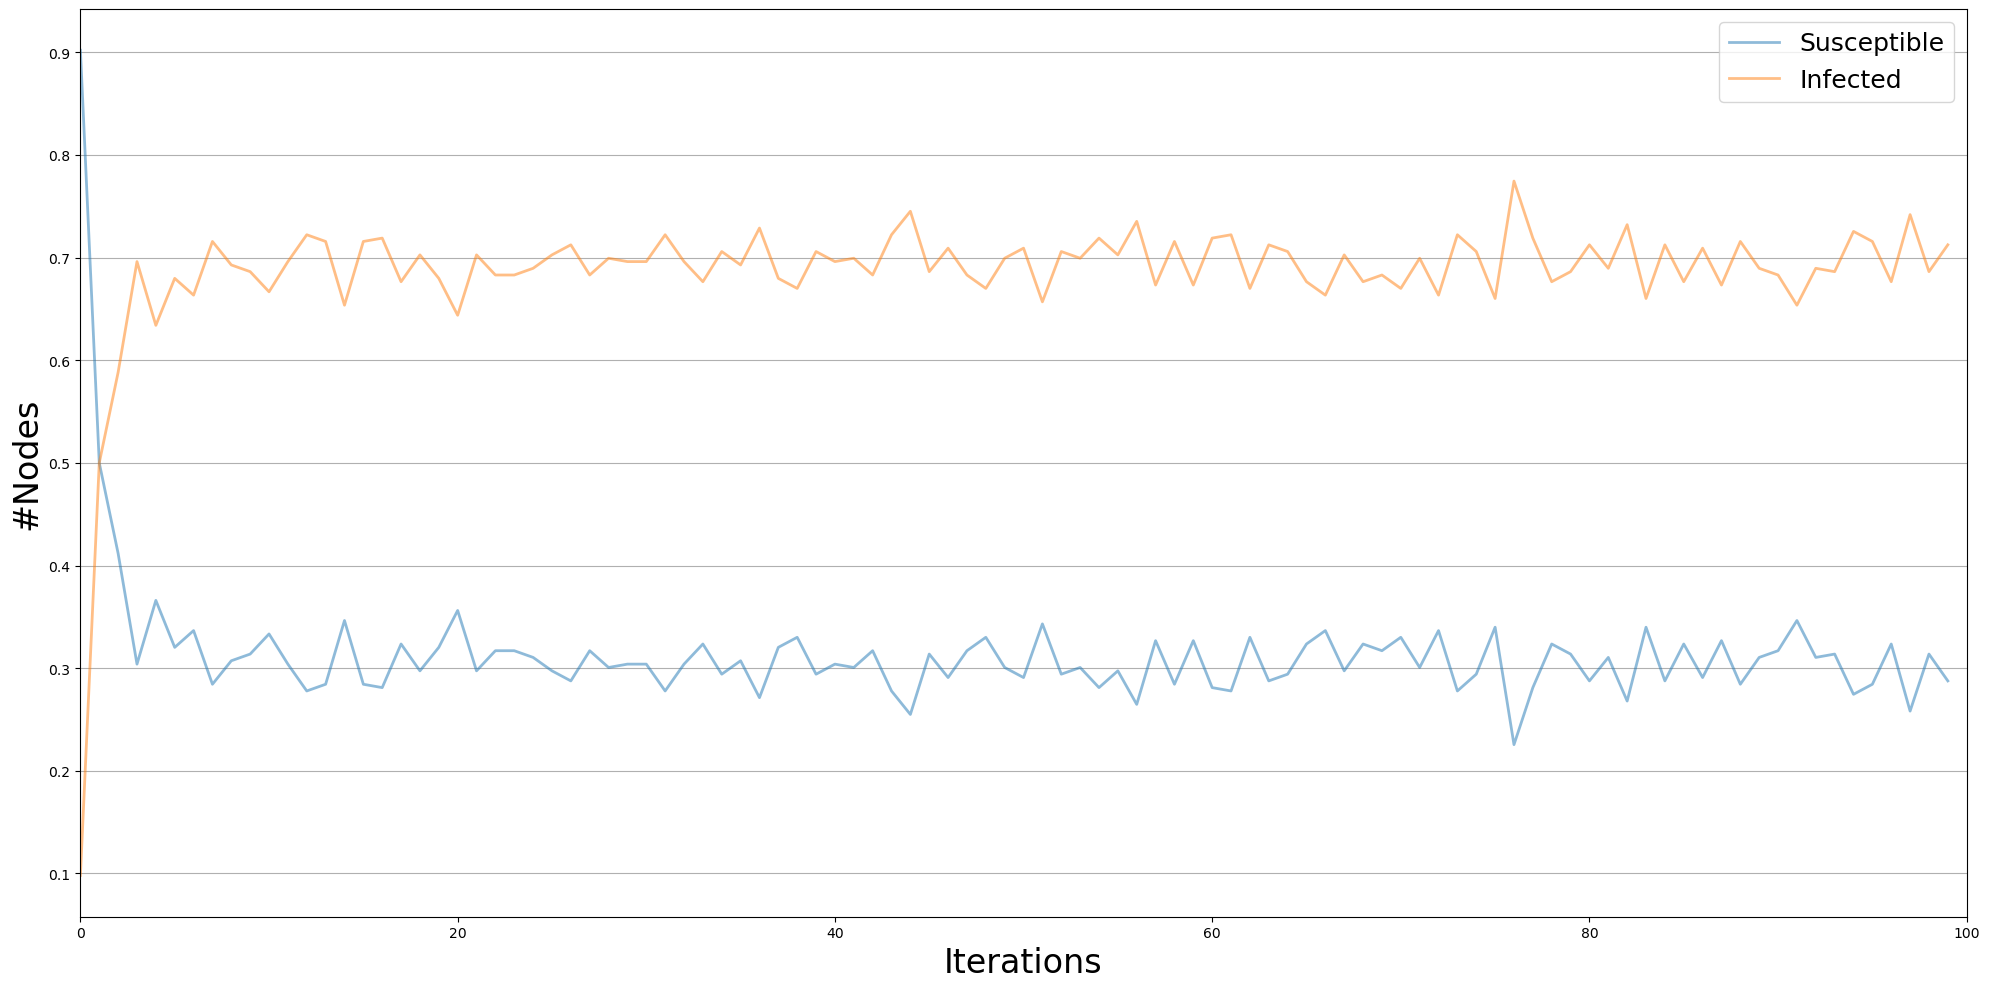

In [22]:
viz = DiffusionTrend(SIS_model, trends)
viz.plot()

<a id="stability"></a>
#### Model Stability ([to top](#top))

Indeed, different initial conditions can affect the overall unfolding of the diffusive process.

In order to analyse the stability of a model w.r.t. the initial seeds ``NDlib`` implements a ``multi_runs`` facility.

``multi_runs`` allows the parallel execution of multiple instances of a given model starting from different initial infection conditions.

> **Note:** If you are Windows users you have to go to the [utils.py](https://github.com/GiulioRossetti/ndlib/blob/master/ndlib/utils.py) file of the library and force the cast of the seeds to int64 in this way:
>
>> seeds = np.around(np.array(np.random.rand(execution_number)*2**32, dtype=np.int64)) 


We can instantiate ``multi_runs`` as follows:

In [23]:
from random import sample
from ndlib.utils import multi_runs

# Mobility Network
g = read_net('../data/flow_nyc_7days.csv')
# Model selection
SIS_model = models.SISModel(g)
# Model Configuration
cfg.add_model_parameter('beta', 0.30) # infection rate
cfg.add_model_parameter('lambda', 0.20) # recovery rate
SIS_model.set_initial_status(cfg)
# Select infected nodes set
random_set = sample(list(g.nodes()), n_infected_nodes)
infection_sets = [hubs, random_set]
# Simulation multiple execution
trends = multi_runs(SIS_model, execution_number=2, iteration_number=100, infection_sets=infection_sets, nprocesses=4)

<a id="stability_vis"></a>
#### Stability Visualisation ([to top](#top))

Model stability can be easily analised by using the visualisation facilities offered by the library: both ``DiffusionTrend`` and ``DiffusionPrevalence`` plots allows to plot mean trends along with their point-wise variation.

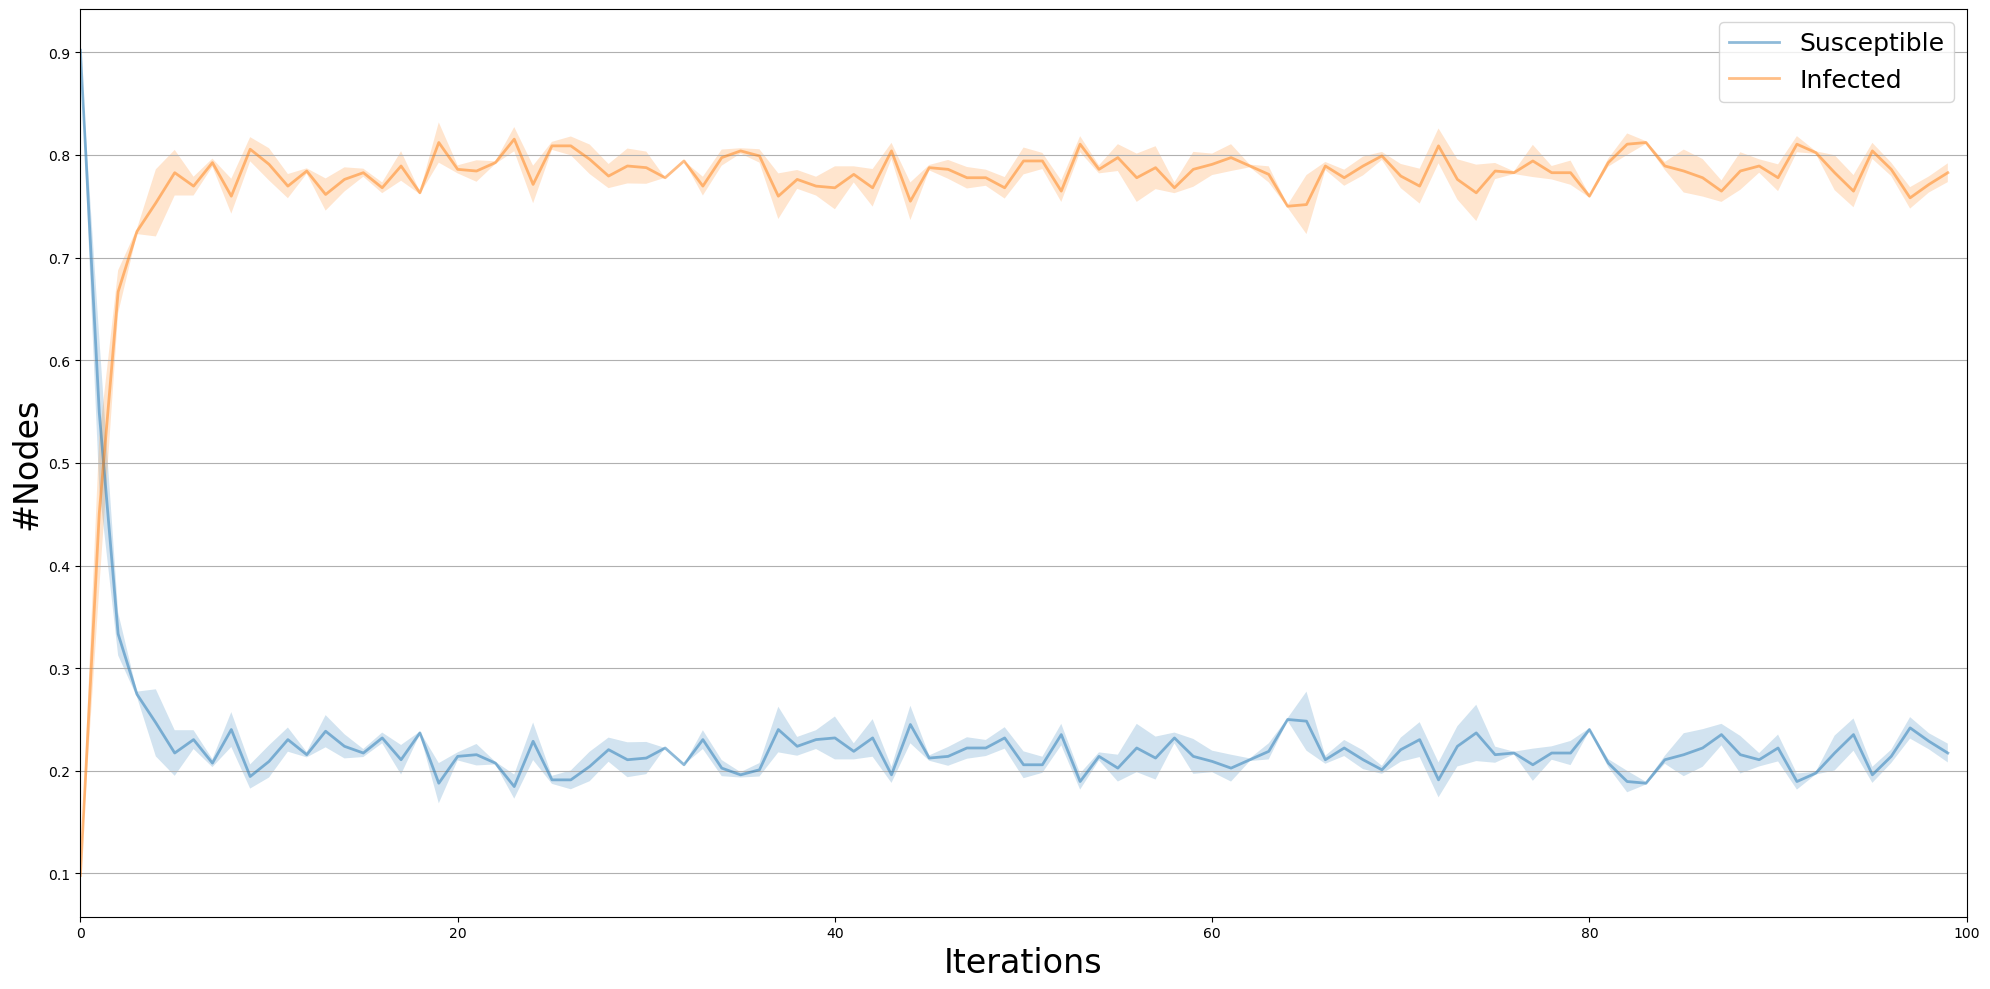

In [24]:
viz = DiffusionTrend(SIS_model, trends)
viz.plot(percentile=90)

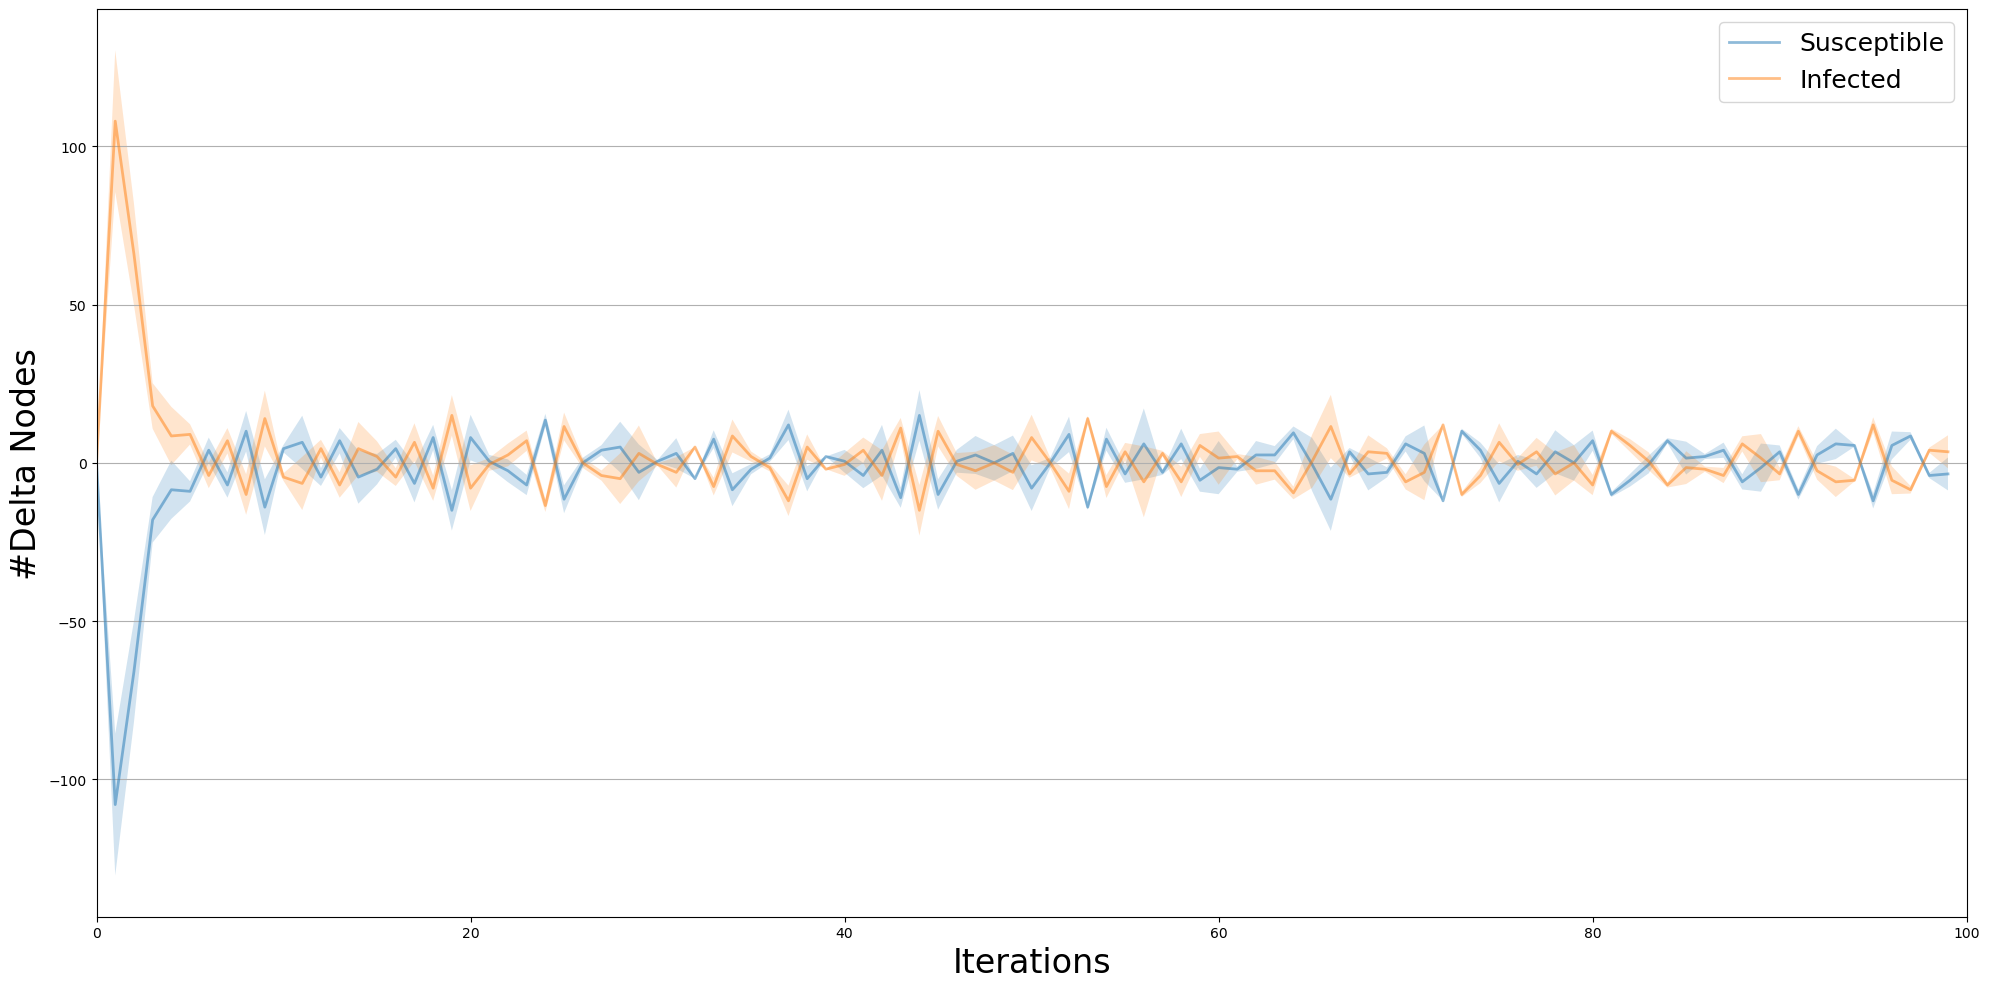

In [25]:
viz = DiffusionPrevalence(SIS_model, trends)
viz.plot(percentile=90)

<a id='decisionbased_core'></a>
## 4. Decision-Based Models ([to top](#top))
___

<img src="https://imagizer.imageshack.com/v2/1024x768q90/924/O9sGbv.png" width="600px" height="250"><br><br>



<a id="graph"></a>
#### Graph object creation ([to top](#top))

In this example, to perform our simulation, we read a **Twitter Social graph** from a .csv file as follows: 

In [26]:
import networkx as nx

def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1])
    return g

# Twitter social graph
g = read_net('../data/social_graph_twitter.csv')
print(g.number_of_nodes())
print(g.number_of_edges())

1946
1755


<a id="threshold"></a>
### 4.A Threshold model ([to top](#top))

In this model, a node has two distinct and mutually exclusive behavioral alternatives, e.g., the decision to do or not do something, to participate or not participate in a riot.

Node’s individual decision depends on the **percentage** of its neighbors that have made the same choice, thus imposing a threshold.

The model works as follows: - each node has its own threshold; - during a generic iteration every node is observed: if the percentage of its infected neighbors is greater than its threshold it becomes infected as well. 

In [27]:
# Model Selection
threshold_model = models.ThresholdModel(g)
print(threshold_model.available_statuses)

{'Susceptible': 0, 'Infected': 1}


To specify the threshold, as well as other node attributes, the ``ModelConfig`` function ``add_node_configuration`` allows you the instantiation of both the *mandatory* and *optional* parameters attached to individual nodes.

We can assign a value of $\tau\%$ to every node as follows:

In [28]:
# Model Configuration
config = mc.Configuration()

# Setting node parameters
threshold = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    
config.add_model_parameter('percentage_infected', 0.1)
threshold_model.set_initial_status(config)

In [29]:
# Simulation Execution
iterations = threshold_model.iteration_bunch(100, node_status=True)
trends_threshold = threshold_model.build_trends(iterations)

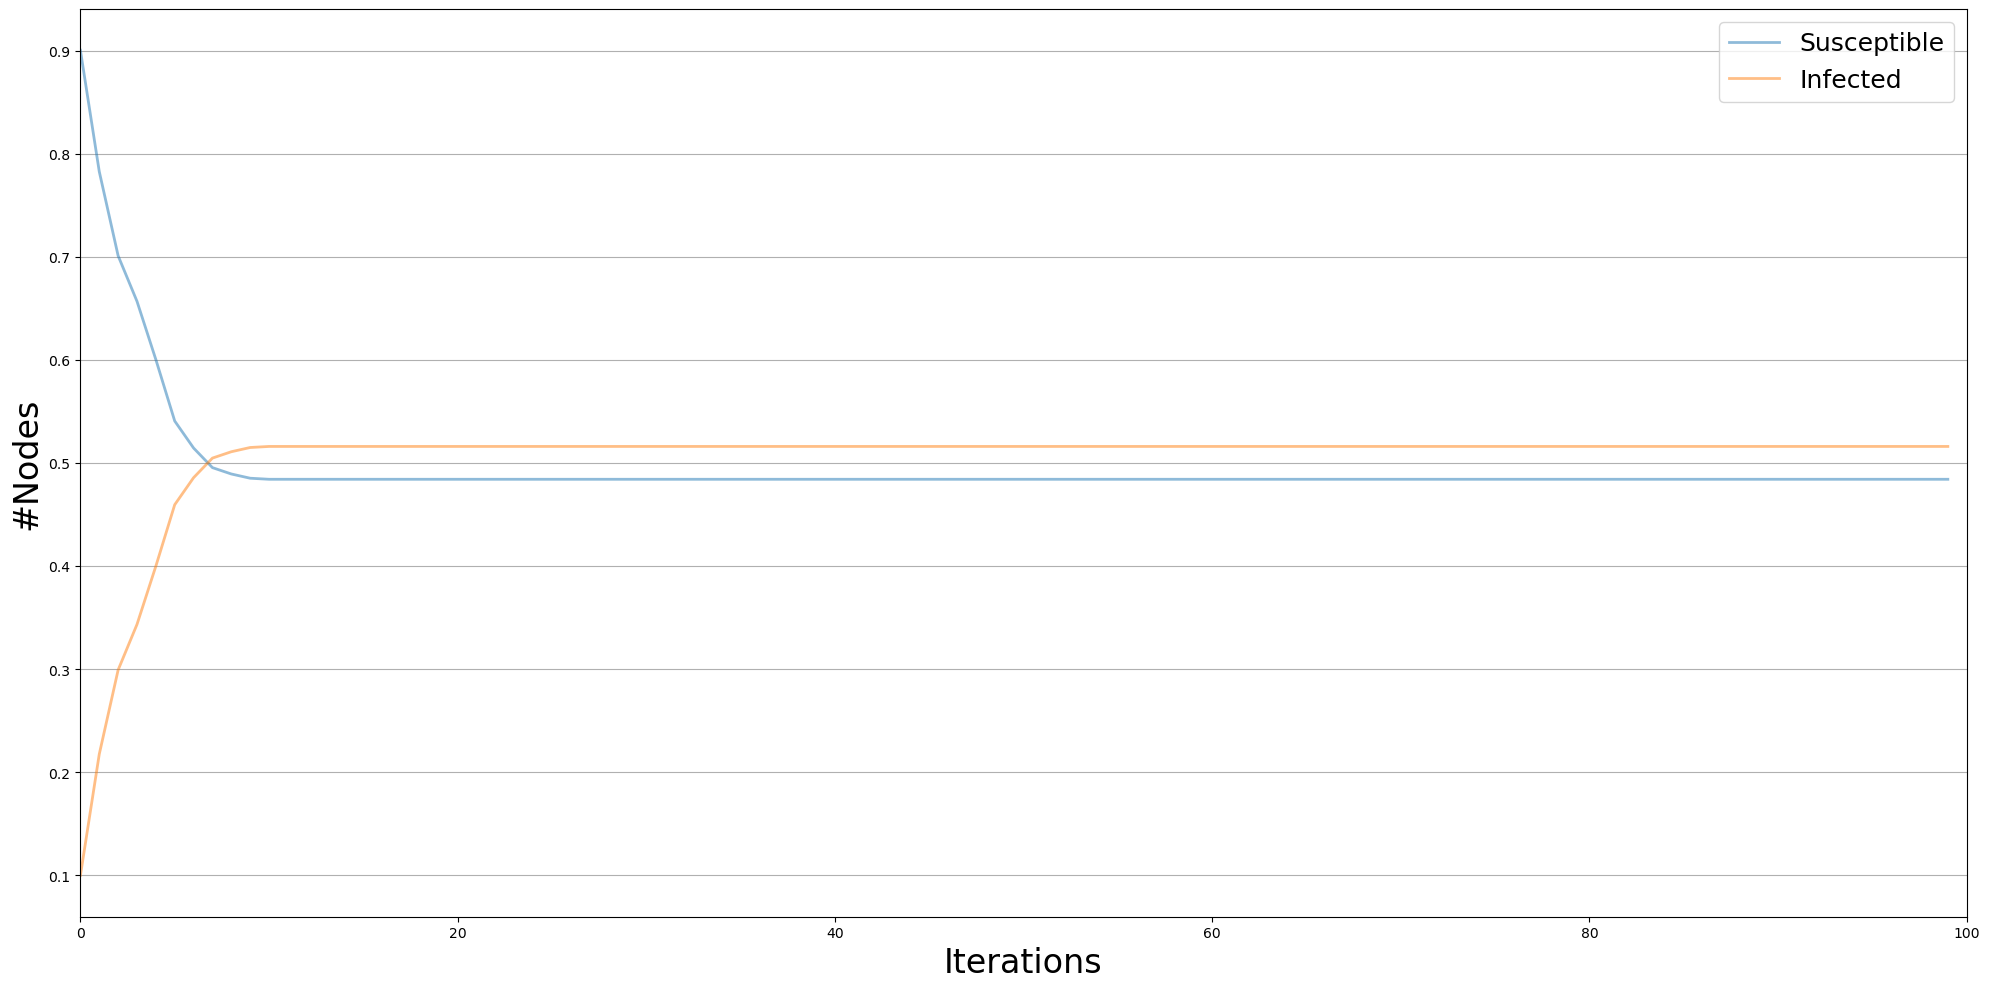

In [30]:
viz = DiffusionTrend(threshold_model, trends_threshold)
viz.plot()

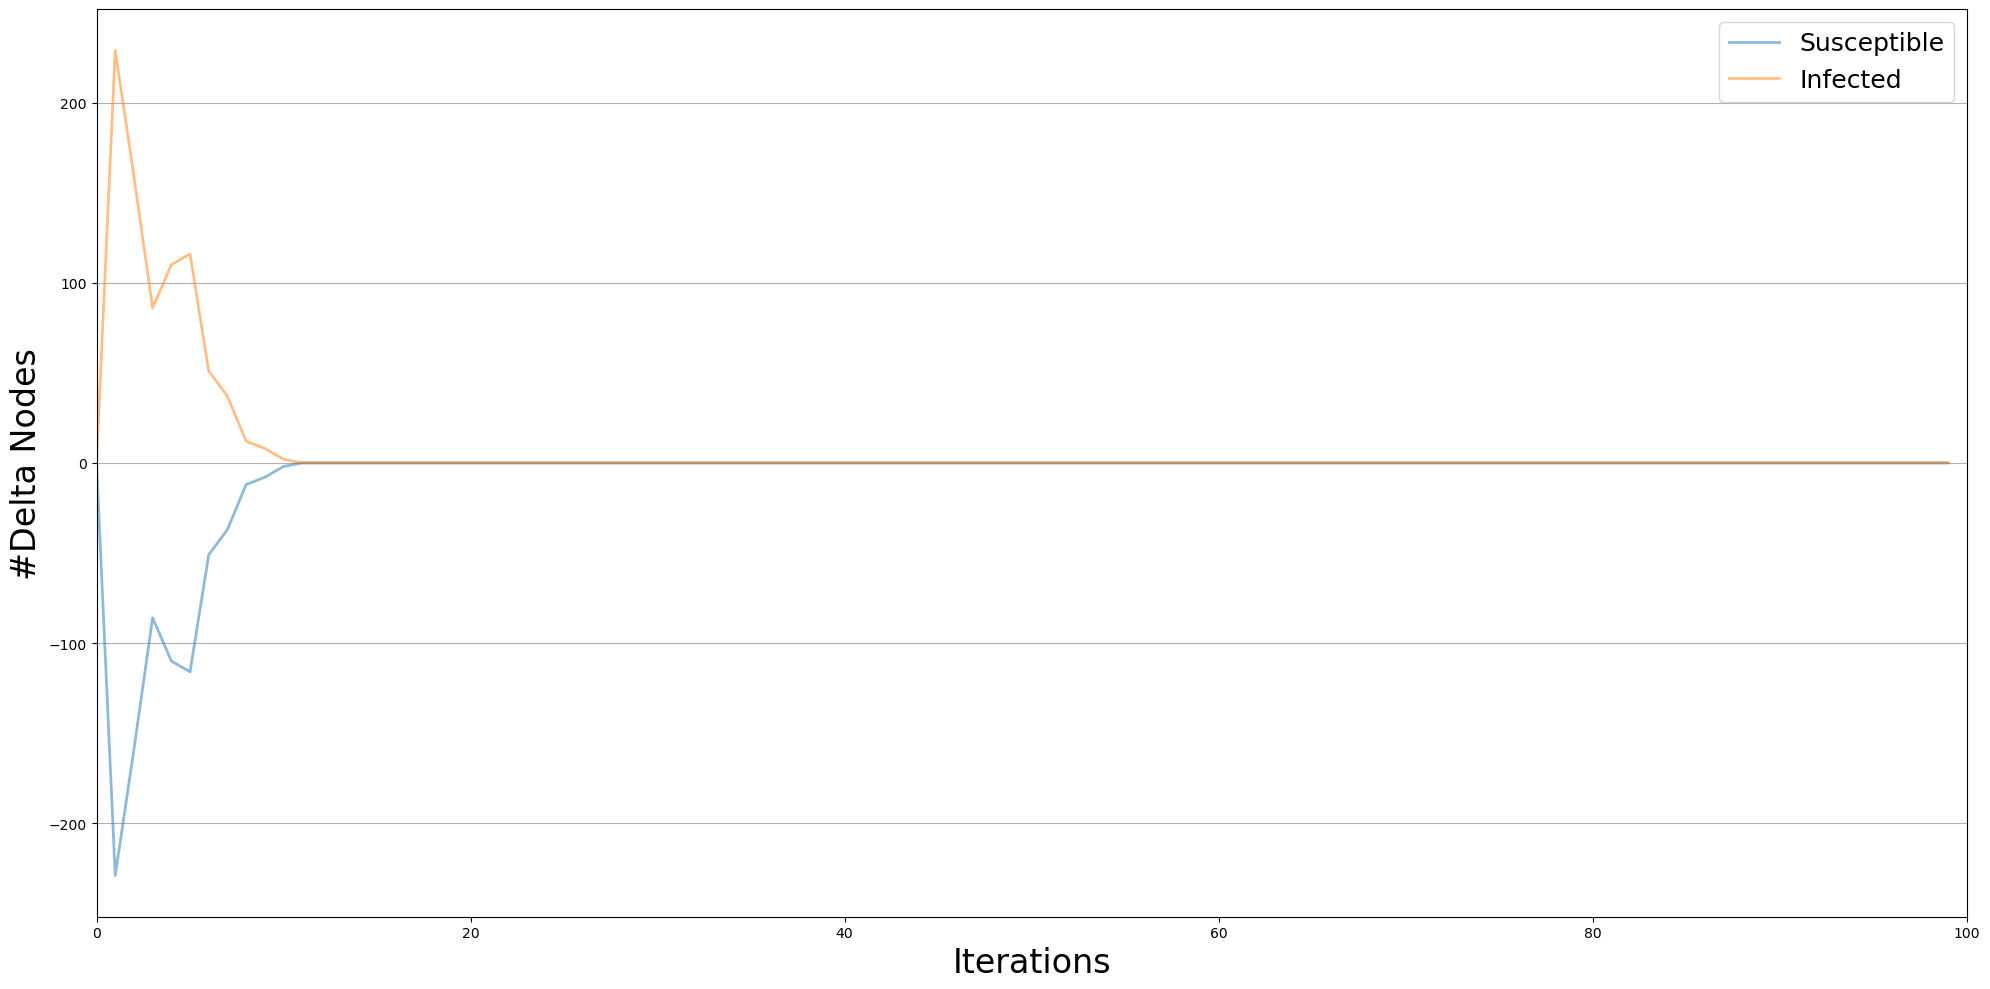

In [32]:
viz = DiffusionPrevalence(threshold_model, trends_threshold)
viz.plot()

<a id="independentcascade"></a>
### 4.B Independent Cascade model ([to top](#top))

This model starts with an initial set of active nodes A0: the diffusive process unfolds in discrete steps according to the following randomized rule:

- When node v becomes active in step t, it is given a single chance to activate each currently inactive neighbor w; it succeeds with a probability p(v,w).
- If w has multiple newly activated neighbors, their attempts are sequenced in an arbitrary order.
- If v succeeds, then w will become active in step t + 1; but whether or not v succeeds, it cannot make any further attempts to activate w in subsequent rounds.
- The process runs until no more activations are possible.

In [33]:
# Twitter social graph
g = read_net('../data/social_graph_twitter.csv')
# Model Selection
cascade_model = models.IndependentCascadesModel(g)
print(cascade_model.available_statuses)

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}


To specify each edge probability of activation, as well as other edge attributes, the ``ModelConfig`` function ``add_edge_configuration`` allows you the instantiation of both the *mandatory* and *optional* parameters attached to individual edges.

We can assign a probability p(v,w) of activation to each edge as follows:

In [34]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)

threshold = 0.25
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold) # edge attribute setting

cascade_model.set_initial_status(config)

In [35]:
# Simulation Execution
iterations = cascade_model.iteration_bunch(100, node_status=True)
trends_cascade = cascade_model.build_trends(iterations)

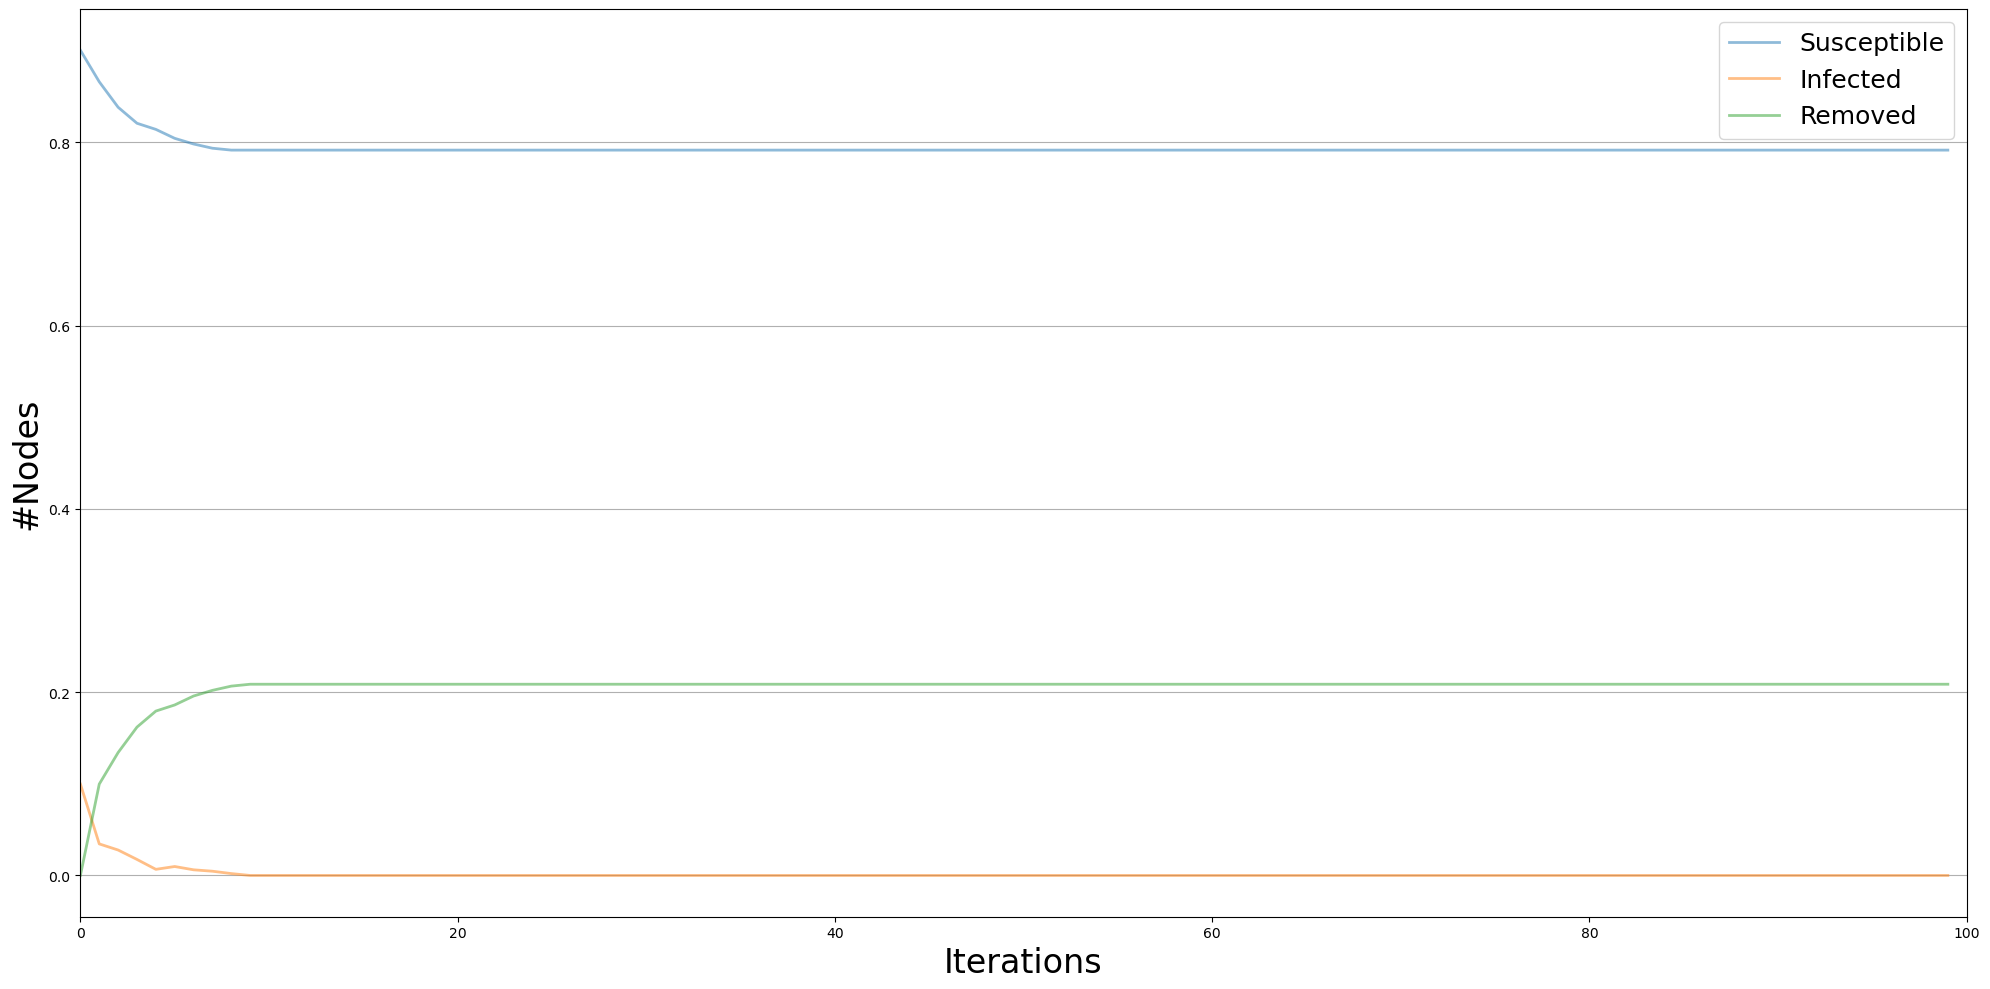

In [36]:
viz = DiffusionTrend(cascade_model, trends_cascade)
viz.plot()

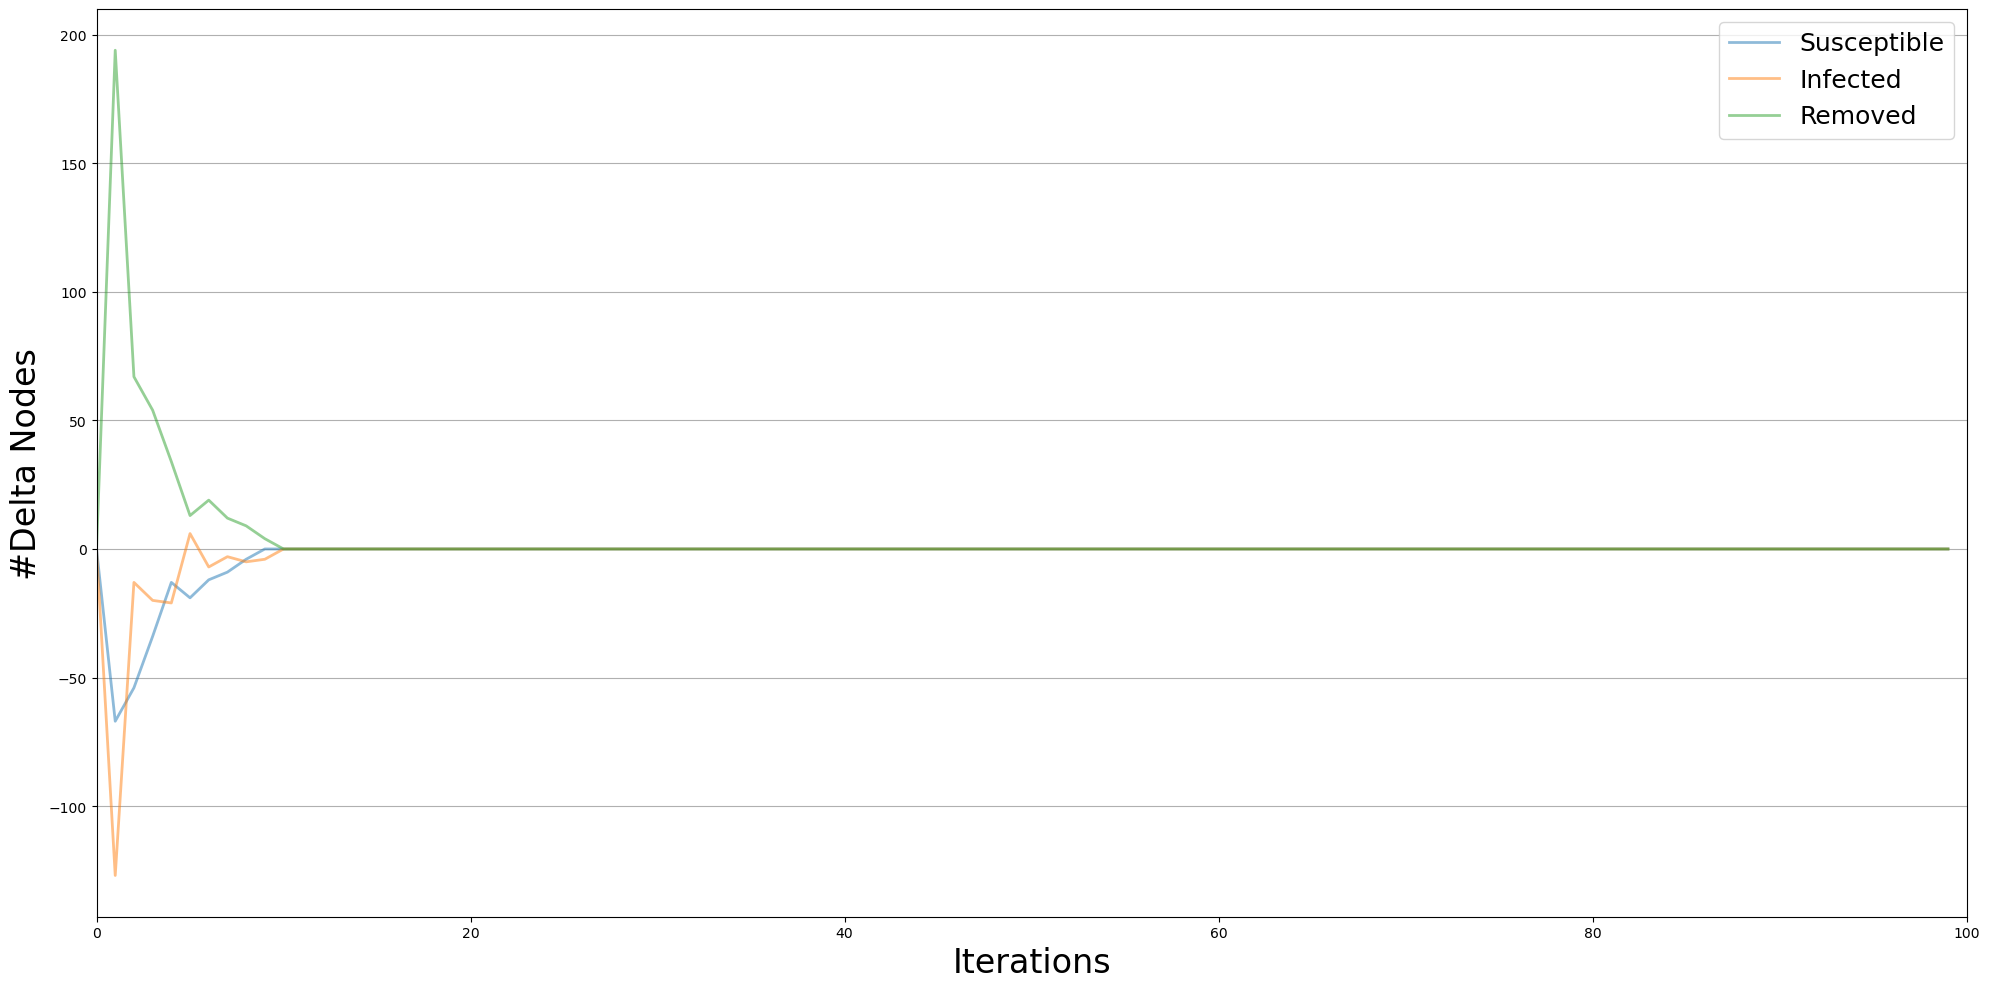

In [37]:
viz = DiffusionPrevalence(cascade_model, trends_cascade)
viz.plot()

<a id="comparing"></a>
### 4.C Comparing Diffusion models ([to top](#top))

A common goal for which diffusion simulations are executed is to perform comparison among different models (or different instantiations of a same model).

To address such demands ``NDlib`` provides visual comparison plots.

To show how they work, we compare the **Threshold** and the **Independent Cascade** models defined above. 

Then, we can compare them:

no display found. Using non-interactive Agg backend


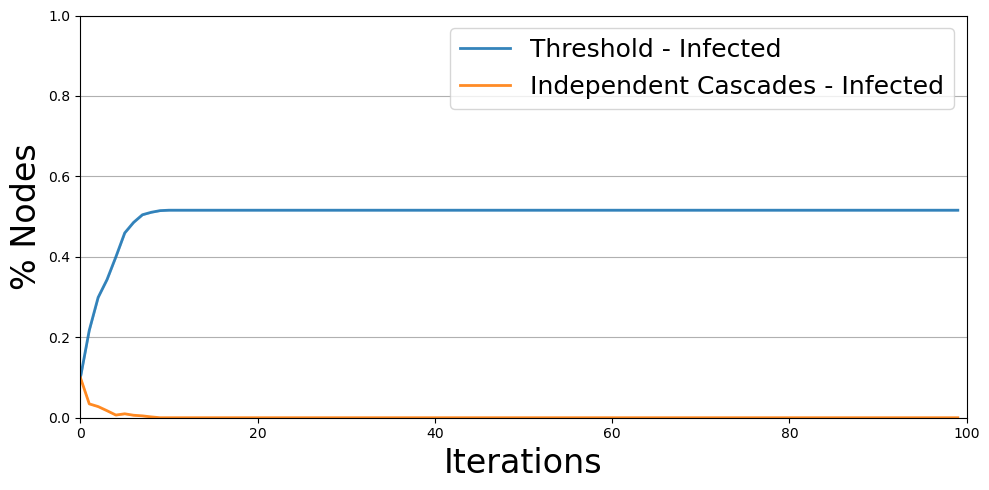

In [38]:

from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([threshold_model, cascade_model], [trends_threshold, trends_cascade], statuses=['Infected'])
viz.plot()

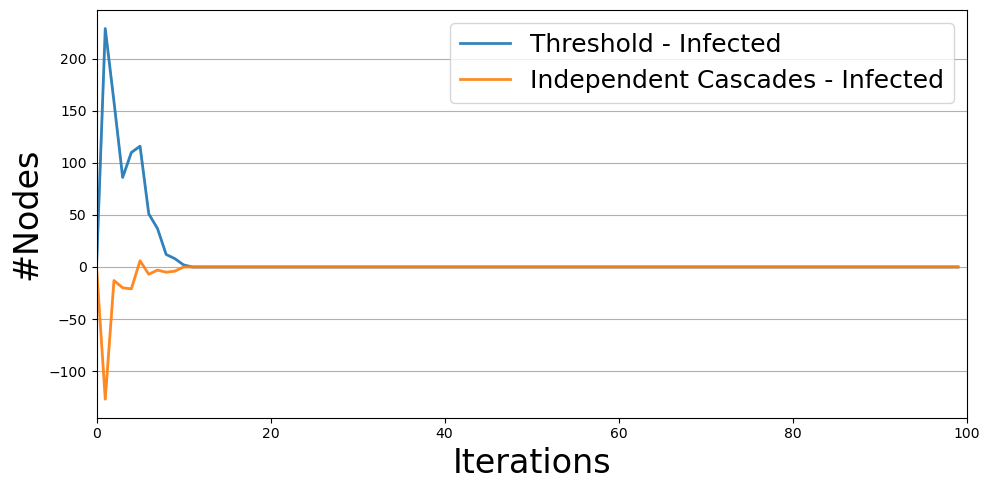

In [39]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([threshold_model, cascade_model], [trends_threshold, trends_cascade], statuses=['Infected'])
viz.plot()

The method parameter ``statuses`` takes as input a list of the models statuses trends we want to compare.
So, for instance, if we are interested in comparing both the trends for *Infected* and *Susceptible* nodes we can do something like this:

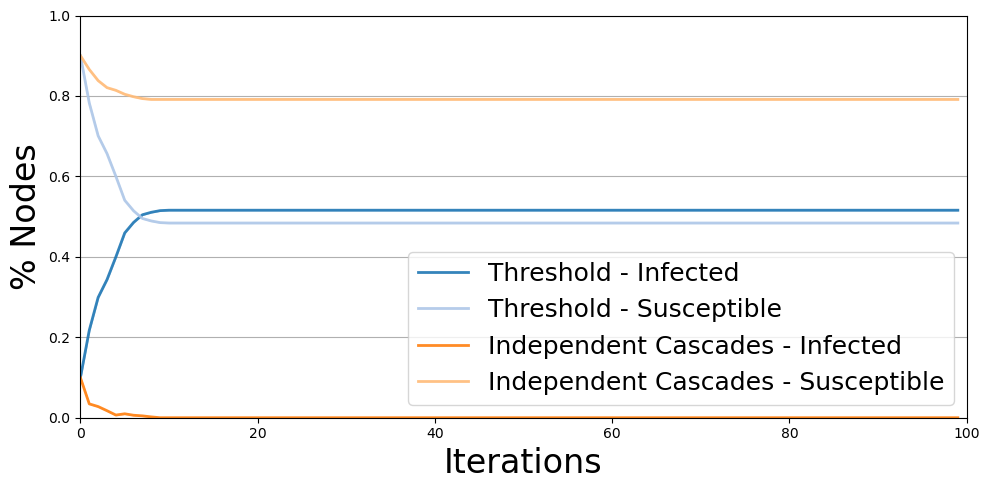

In [40]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([threshold_model, cascade_model], [trends_threshold, trends_cascade], statuses=['Infected', 'Susceptible'])
viz.plot()

<a id="custom"></a>
## 5. Custom Model Definition ([to top](#top))
___
``NDlib`` comes with a handy syntax for compositional (custom) model definition to support its users in designing novel diffusion models.

At a higher level of abstraction a generic diffusion process can be described by two components:

1. The nodes' ``statuses`` it exposes, and
2. the ``transition rules`` that regulate status changes.

We recall that all models of ``NDlib`` assume an agent-based, discrete-time, simulation engine. 

During each iteration all the nodes in the network are asked to 
1. evaluate their current status and to 
2. (eventually) apply a matching transition rule. 

A generic ``transition rule`` can be expressed with something like:

> **if** ``actual_node_status`` **and** ``condition`` **then** ``new_node_status``

The ``condition`` can be easily decomposed into the evaluation of atomic operations that we will call ``compartments``. The evaluation of a compartment can return either ``True`` (condition satisfied) or ``False`` (condition not satisfied).

A simple ``condition`` is composed by a single ``compartment``.

Indeed, several ``compartments`` can be described, each one of them capturing an atomic operation.

A custom model, having three statuses (``Susceptible``, ``Infected``, ``Recovered``), can be instantiated as follows:

In [42]:

import ndlib.models.CompositeModel as gc
import ndlib.models.compartments as cpm

# Composite Model instantiation
model = gc.CompositeModel(g)
model.add_status("Susceptible")
model.add_status("Infected")
model.add_status("Recovered")

<a id="compartments"></a>
### 5.A Compartments ([to top](#top))

> *Which are the atomic conditions that can be used to define complex transition rules?*

To answer such question we identified three families of ``compartments`` (and some operations to combine them).

<a id="nc"></a>
#### Node Compartments ([to top](#top))
In this class fall all those compartments that evaluate conditions tied to node status/features. They model stochastic events as well as deterministic ones.

<table>
    <tr><td><b>Name</b></td><td><b>Use case</b></td><tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/NodeStochastic.html'>Node Stochastic</a></td>
        <td>Consider a rule that requires a <b>probability</b> $\beta$ to be satisfied. </td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/NodeCategoricalAttribute.html'>Node Categorical Attribute</a></td>
        <td>Consider a rule that requires a specific value of a <b>categorical</b> node attribute to be satisfied (e.g. “Sex”=”male”).</td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/NodeNumericalAttribute.html'>Node Numerical Attribute</a></td>
        <td>Consider a rule that requires a specific value of a <b>numerical</b> node attribute to be satisfied (e.g. “Age” >= 18).</td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/NodeThreshold.html'>Node Threshold</a></td>
        <td>Consider a rule that requires that, at least, a <b>percentage</b> $\beta$ of Infected neighbors for a node to be satisfied.</td>
    </tr>
</table>

Let's add to our model a rule employing a node stochastic compartment:

In [43]:
# Compartment description
c1 = cpm.NodeStochastic(0.02, triggering_status="Infected")

# Rule definition
model.add_rule("Susceptible", "Infected", c1)

The **Susceptble -> Infected** rule defined works as follows:
- if a node $n$ is *susceptible*, and
- if $n$ has at least an *infected* neighbor (``triggering_status``)
- then, with probability $0.02$, $n$ status will shift to *infected*

<a id="ec"></a>
#### Edge Compartments ([to top](#top))
In this class fall all those compartments that evaluate conditions tied to edge features. They model stochastic events as well as deterministic ones.


<table>
    <tr><td><b>Name</b></td><td><b>Use case</b></td><tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/EdgeStochastic.html'>Edge Stochastic</a></td>
        <td>Consider a rule tha requires a direct link among an infected node and a susceptible one and that is subject to a <b>probability</b> $\beta$ tied to such edge.</td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/EdgeCategoricalAttribute.html'>Edge Categorical Attribute</a></td>
        <td>Consider a rule tha requires a link among an infected node and a susceptible one that has a specific <b>categorical</b> value (e.g. “type”=”co-worker”)</td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/EdgeNumericalAttribute.html'>Edge Numerical Attribute</a></td>
        <td>Consider a rule tha requires a link among an infected node and a susceptible one that has a specific <b>numerical</b> value (e.g. “weight”<3)</td>
    </tr>  
</table>

Let's add to our model a rule employing an edge stochastic compartment:

In [44]:
#import ndlib.models.compartments.EdgeStochastic as es

c2 = cpm.EdgeStochastic(0.02, triggering_status="Recovered")

# Rule definition
model.add_rule("Infected", "Recovered", c2)

The **Infected -> Recovered** rule defined works as follows:
- if a node $n$ is *infected*, and
- let $\Gamma$ be the set containing the *recovered* (``triggering_status``) neighbors of $n$
    - then for each node $v\in \Gamma$ with probability $0.02$, $n$ status will shift to *recovered*

<a id="tc"></a>
#### Time Compartments ([to top](#top))
In this class fall all those compartments that evaluate conditions tied to temporal execution. They can be used to model, for instance, lagged events as well as triggered transitions.

<table>
    <tr><td><b>Name</b></td><td><b>Use case</b></td><tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/custom/compartments/CountDown.html'>Count Down</a></td>
        <td>Consider a rule that has an <b>incubation</b> period of $t$ iterations.</td>
    </tr>
</table>


Let's add to our model a rule employing a count down compartment

In [45]:
c3 = cpm.CountDown("incubation", iterations=10)

# Rule definition
model.add_rule("Recovered", "Susceptible", c1)

The **Recovered -> Susceptible** rule defined works as follows:
- if a node $n$ is *recovered* a count down named ``incubation`` is instantiated
- during each iteration ``incubation`` is decremented
- when ``incubation=0`` $n$ shifts to *susceptible*

<a id="composition"></a>
### 5.B Compartments Composition ([to top](#top))

Compartment can be chained in multiple ways so to describe complex transition rules. 

In particular, a transition rule can be seen as a tree whose nodes are compartments and edges connections among them.

As an example consider the following picture describing the structure of a composite **Susceptible->Infected** transition rule.

<img src="https://imagizer.imageshack.com/v2/1024x768q90/923/hR1th9.png" width="600px" height="auto"><br><br>

- The initial node status is evaluated at the root of the tree (the master compartment)
    - If the operation described by such compartment is satisfied the conditions of (one of) its child compartments is evaluated
    - If a path from the root to one leaf of the tree is completely satisfied the transition rule applies and the node change its status.

Compartments can be combined following two criteria:

- Cascading Composition
- Conditional Composition

A ``transition rule`` can be defined by employing all possible combinations of cascading and conditional compartment composition.

<a id="cascading"></a>
#### Cascading Composition ([to top](#top))

Since each compartment identifies an atomic condition it is natural to imagine rules described as chains of compartments.

A compartment chain identify and ordered set of conditions that needs to be satisfied to allow status transition (it allows describing an **AND** logic).

To implement such behaviour each compartment exposes a parameter (named ``composed``) that allows to specify the subsequent compartment to evaluate in case it condition is satisfied.

#### Example

In the following scenario the **Susceptible->Infected** rule is implemented using three NodeStochastic compartments chained as follows:

$$C_1 \rightarrow C_2 \rightarrow C_3$$

- If the node $n$ is *Susceptible*
 - $C_1$: if at least a neighbor of the actual node is *Infected*, with probability $0.5$ evaluate compartment $C_2$
 - $C_2$: with probability $0.4$ evaluate compartment $C_3$
 - $C_3$: with probability $0.2$ allow the transition to the *Infected* state

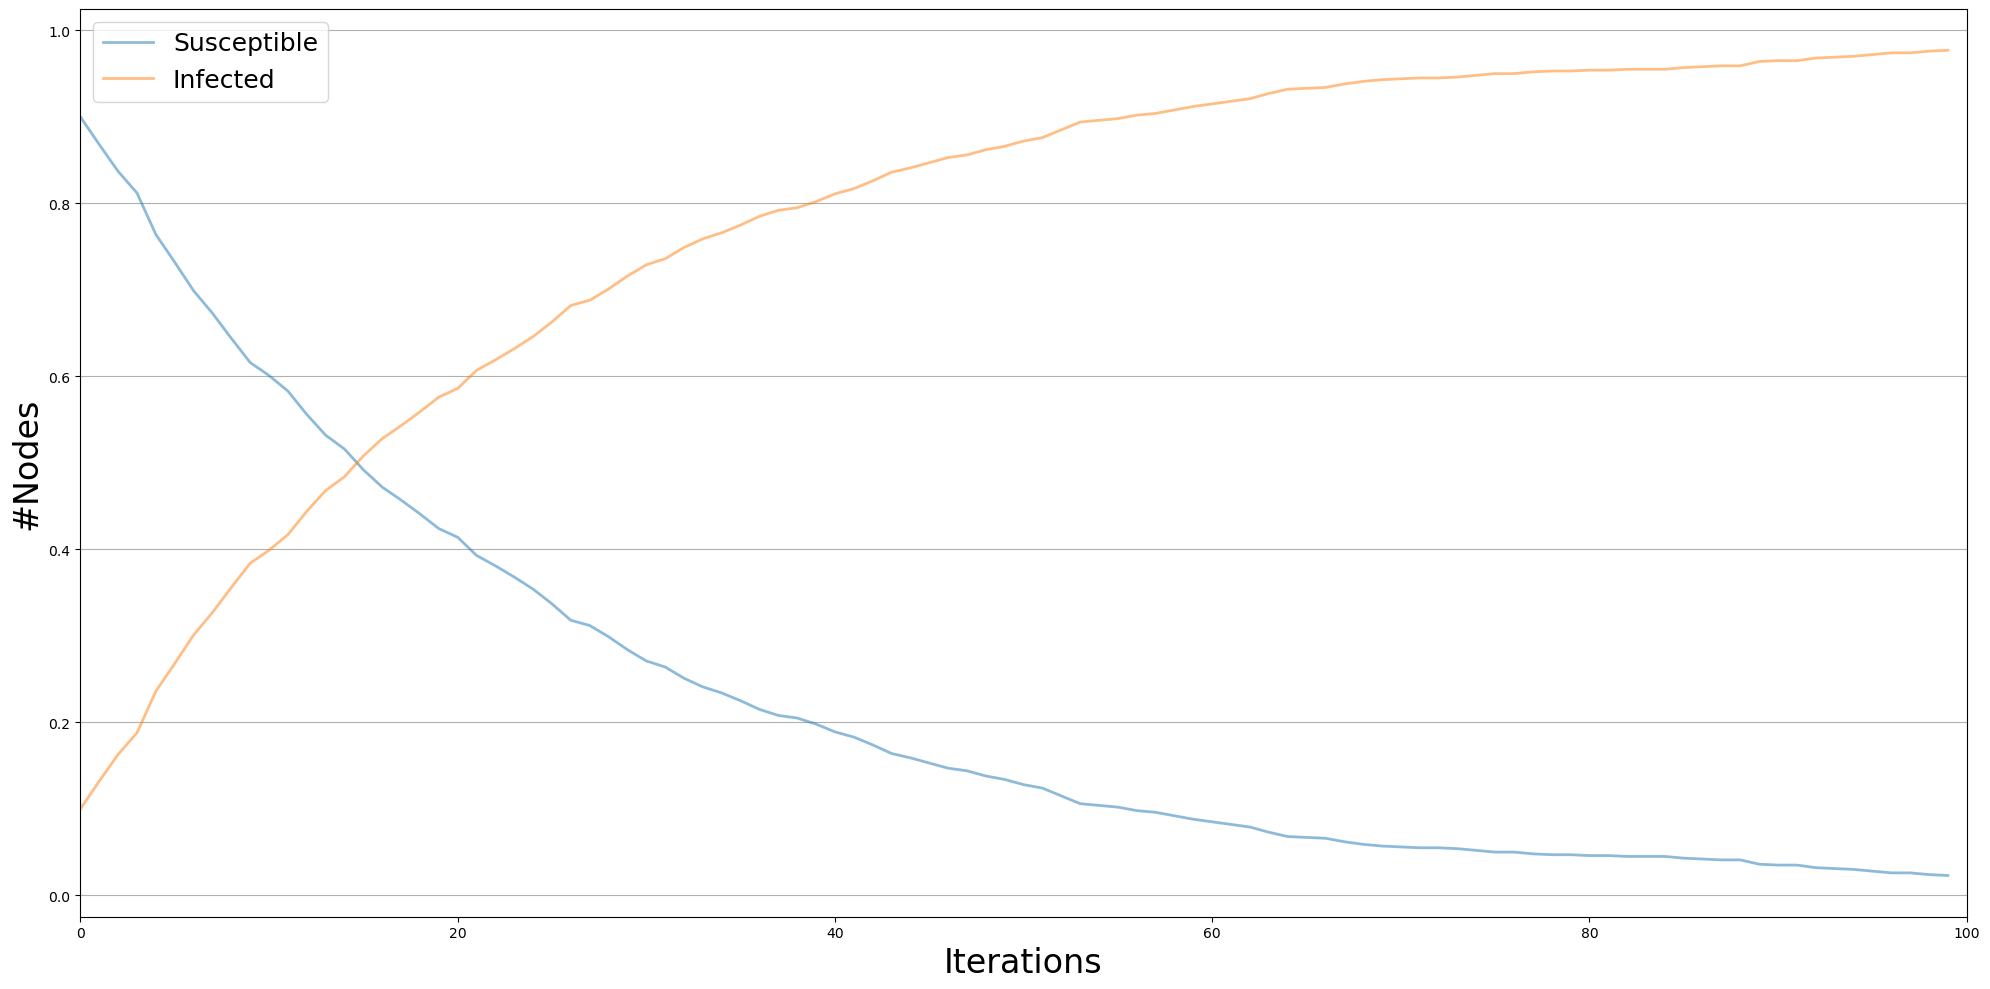

In [46]:
# Network generation
g = nx.erdos_renyi_graph(1000, 0.1)

# Composite Model instantiation
model = gc.CompositeModel(g)

# Model statuses
model.add_status("Susceptible")
model.add_status("Infected")

# Compartment definition and chain construction
c3 = cpm.NodeStochastic(0.2)
c2 = cpm.NodeStochastic(0.4, composed=c3)
c1 = cpm.NodeStochastic(0.5, "Infected", composed=c2)

# Rule definition
model.add_rule("Susceptible", "Infected", c1)

# Model initial status configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)
  
# Simulation execution
model.set_initial_status(config)
iterations = model.iteration_bunch(100)

trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="conditional"></a>
#### Conditional Composition ([to top](#top))

Conditional compartment composition allows to describe rules as trees.

A compartment tree identify and ordered and disjoint set of conditions that needs to be satisfied to allow status transition (it allows describing an **OR** logic).

``ConditionalComposition`` compartment allows to describe branching pattern as follows:

$$if\ C_i then\ C_j else\ C_z$$

``ConditionalComposition`` evaluate the guard compartment ($C_i$) and, depending from the result it gets (True or False) move to the evaluation of one of its two child compartments ($C_j$ and $C_z$).

#### Example

In the following scenario the **Susceptible->Infected** rule is implemented using three NodeStochastic compartments combined as follows:

- If the node $n$ is *Susceptible*
    - $C_1$: if at least a neighbor of the actual node is *Infected*, with probability $0.5$ evaluate compartment $C_2$ else evaluate compartment $C_3$
        - $C_2$: with probability $0.2$ allow the transition to the *Infected* state
        - $C_3$: with probability $0.1$ allow the transition to the *Infected* state


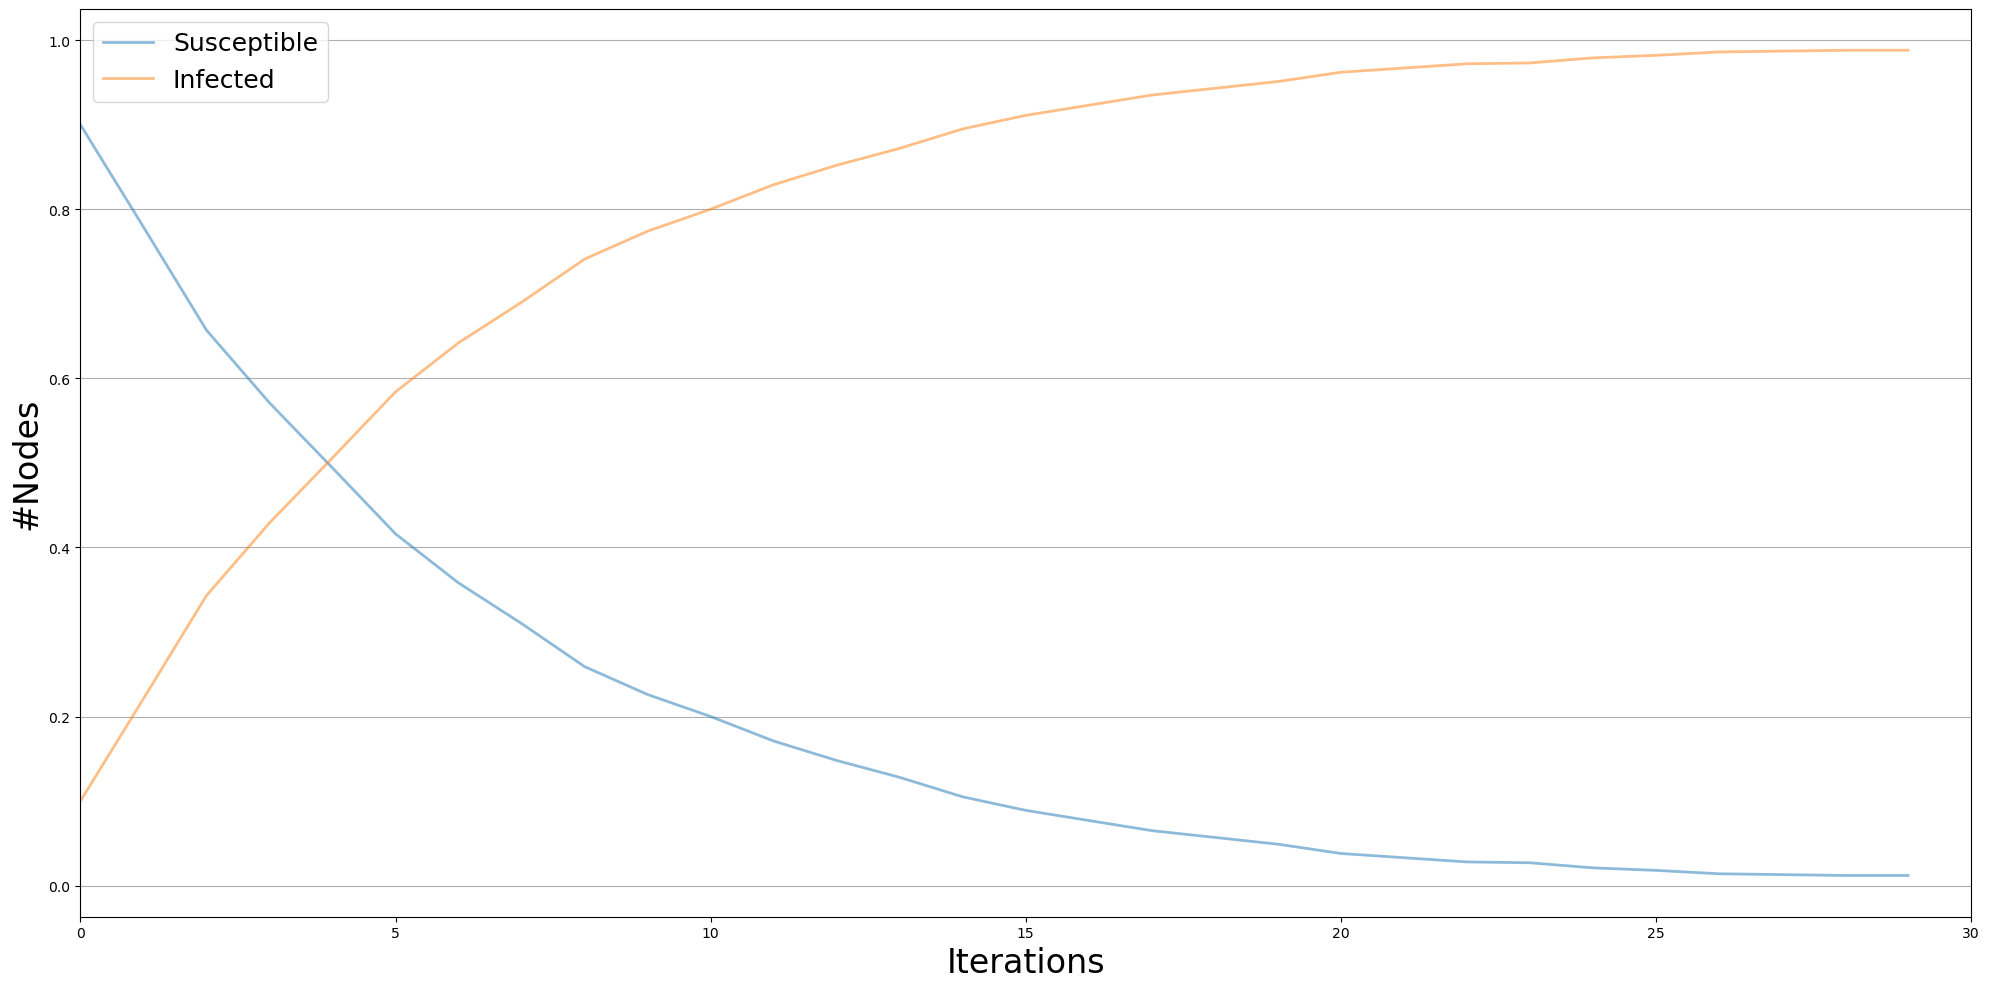

In [47]:
#import ndlib.models.compartments.ConditionalComposition as cif

# Network generation
g = nx.erdos_renyi_graph(1000, 0.1)

# Composite Model instantiation
model = gc.CompositeModel(g)

# Model statuses
model.add_status("Susceptible")
model.add_status("Infected")

# Compartment definition
c1 = cpm.NodeStochastic(0.5, "Infected")
c2 = cpm.NodeStochastic(0.2)
c3 = cpm.NodeStochastic(0.1)

# Conditional Composition
cc = cpm.ConditionalComposition(c1, c2, c3)

# Rule definition
model.add_rule("Susceptible", "Infected", cc)

# Model initial status configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)

# Simulation execution
model.set_initial_status(config)
iterations = model.iteration_bunch(30)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()

<a id="sir"></a>
### 5.C Example: SIR ([to top](#top)) 

Let's describe, and simulate, a **SIR** model using compartments.

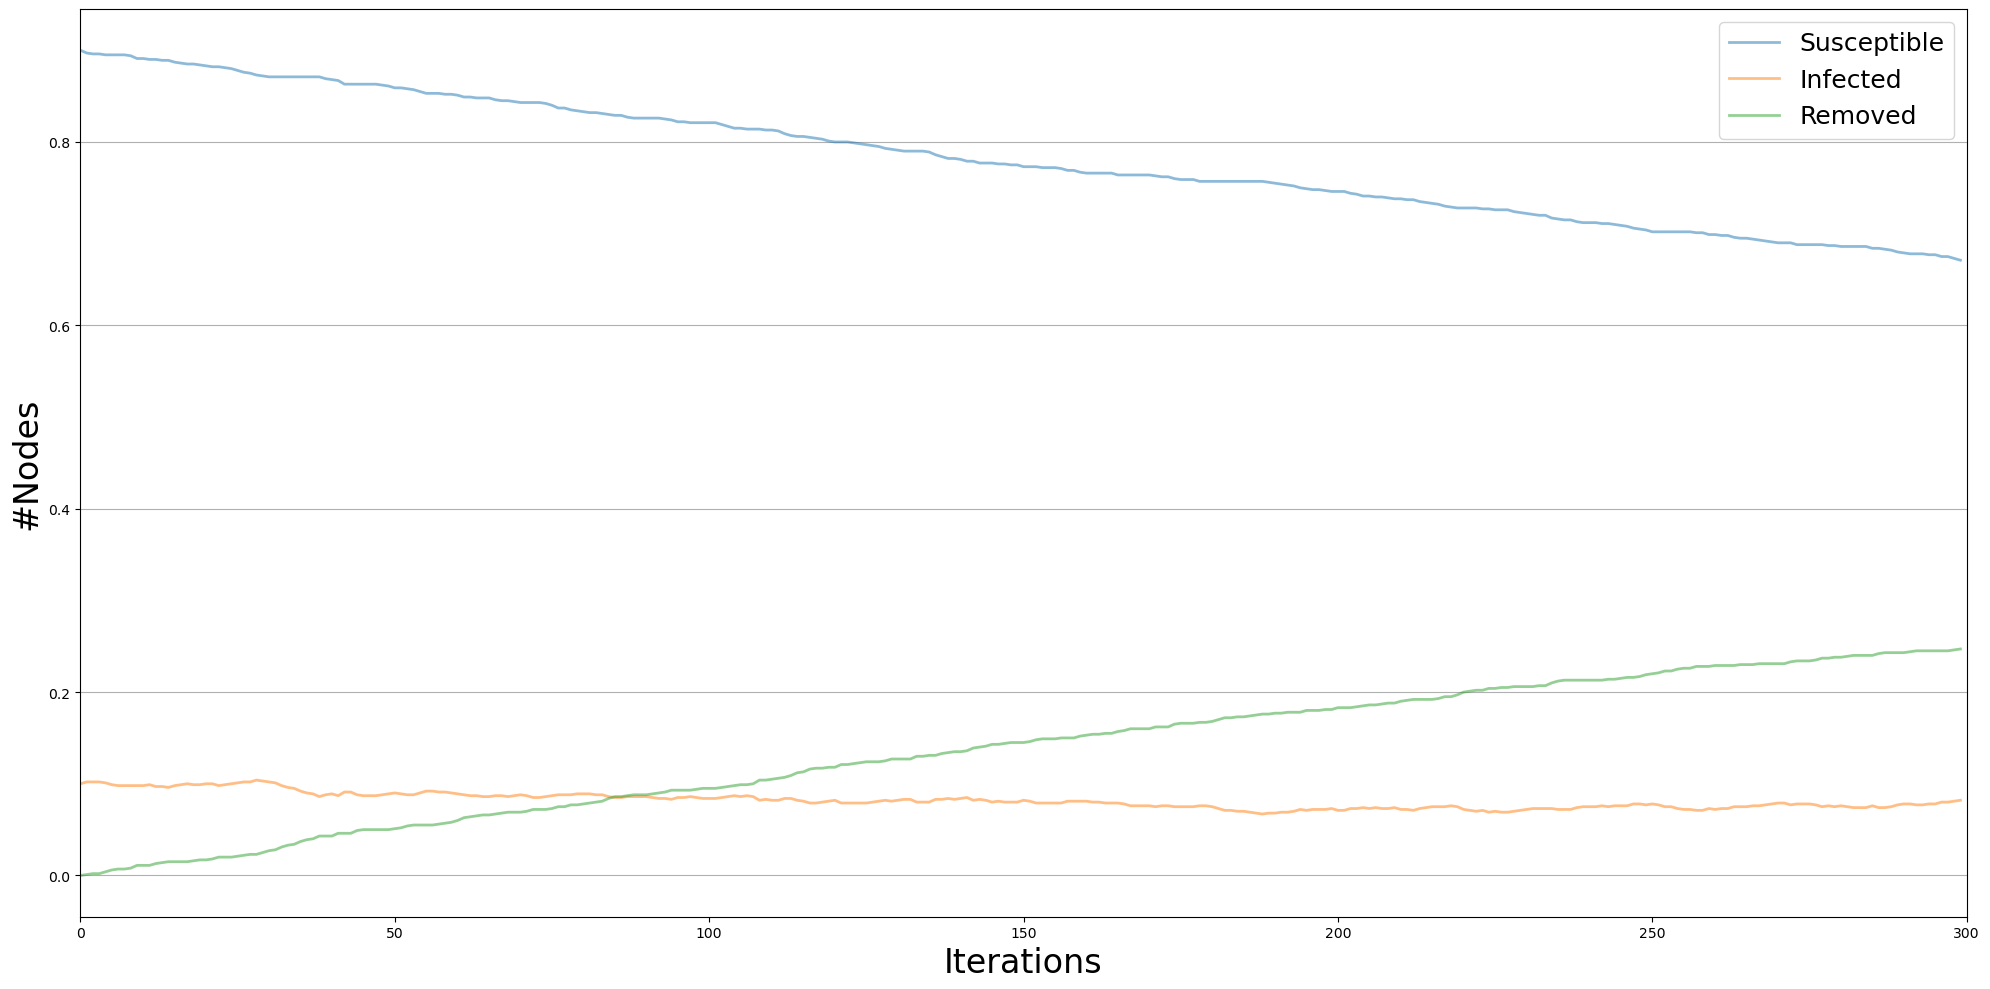

In [48]:
from ndlib.models.CompositeModel import CompositeModel
from ndlib.models.compartments.NodeStochastic import NodeStochastic

# Network definition
g1 = nx.erdos_renyi_graph(n=1000, p=0.1)

# Model definition
SIR = CompositeModel(g1)
SIR.add_status('Susceptible')
SIR.add_status('Infected')
SIR.add_status('Removed')

# Compartments
c1 = NodeStochastic(triggering_status='Infected', rate=0.001, probability=1)
c2 = NodeStochastic(rate=0.01, probability=1)

# Rules
SIR.add_rule('Susceptible', 'Infected', c1)
SIR.add_rule('Infected', 'Removed', c2)

# Configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)
SIR.set_initial_status(config)

# Simulation
iterations = SIR.iteration_bunch(300, node_status=False)
trends = SIR.build_trends(iterations)
viz = DiffusionTrend(SIR, trends)
viz.plot()

<a id="conclusion"></a>
## 6. Conclusions ([to top](#top))
___

In this notebook we introduced the basic facilities offered by ``NDlib`` as concern **Epidemic** and **Decision-Based** models.

For any issue, suggestion, bug report feel free to contact us on the official [GitHub repository](https://github.com/GiulioRossetti/ndlib) of the project.

Moreover, give also a look to [``NDlib-REST``](https://github.com/GiulioRossetti/ndlib-rest) and [``NDlib-viz``](https://github.com/rinziv/NDLib-Viz) the experiment server and web-based visual interface built on top of our library.

<a id="exercise"></a>
## 7. Exercise ([to top](#top))
___

**Reference:**  [The Atlas for the Aspiring Network Scientist](https://arxiv.org/pdf/2101.00863.pdf)

## First Question

Implement a ``SI`` model on this [Network edgelist](http://www.networkatlas.eu/exercises/17/1/data.txt).

Run it 10 times with different β values: **0.05**, **0.1**, and **0.2**.

For each run pick a random node and place it in the Infected state.

What’s the average time step in which each of those β infects **80%** of the network?

## Second Question

Extend your SI model to a ``SIS``. With β = **0.2**, run the model with λ values of **0.05**, **0.1**, and **0.2** on the same network used in the previous questions. 

Run the SIS model, with a random node as a starting Infected set, for 100 steps and plot the share of nodes in the Infected state. 

For which of these values and networks do you have an endemic state? How big is the set of nodes in state I compared to the number of nodes in the network? 

**Note:** Randomness might affect your results. Run the experiment multiple times.

## Third Question

Extend your SI model to a ``SIR``. With b = **0.2**, run the model for 400 steps with m values of **0.01**, **0.02**, and **0.04** and plot the share of nodes in the Removed state for the network used in the previouses questions. 

How quickly does it converge to a full **R** state network?